In [1]:
import json
import urllib.request
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [ ]:
file_path = 'processed_data.pkl'

with open(file_path, 'rb') as file:
    data = pickle.load(file)

df = pd.DataFrame(data)
print(df.head())


0


Question 1: What is the total volume of requests per year, or how many 311 requests is the city receiving per year?

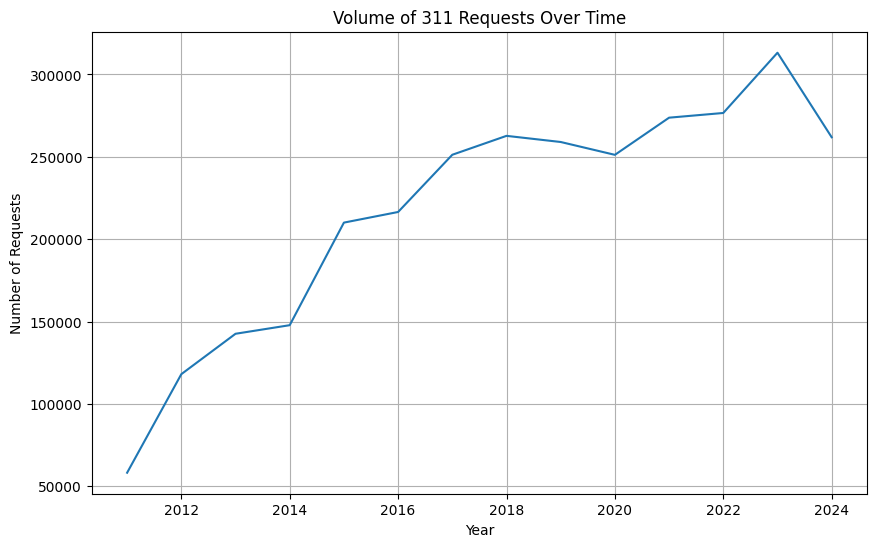

In [3]:
df['year'] = df['open_dt'].dt.year
requests_per_year = df.groupby('year')['case_enquiry_id'].count()
plt.figure(figsize=(10, 6))
plt.plot(requests_per_year.index, requests_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Requests')
plt.title('Volume of 311 Requests Over Time')
plt.grid(True)
plt.show()

Question 2: Which service requests are most common for the city overall AND by NEIGHBORHOOD and how is this changing year over year by SUBJECT (department), REASON,QUEUE?

ERROR! Session/line number was not unique in database. History logging moved to new session 12


C:\Users\nlnlg\AppData\Local\Temp\ipykernel_35328\4088684719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['main_section'] = df['queue'].str.split('_').str[0]
C:\Users\nlnlg\AppData\Local\Temp\ipykernel_35328\4088684719.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x1200 with 0 Axes>

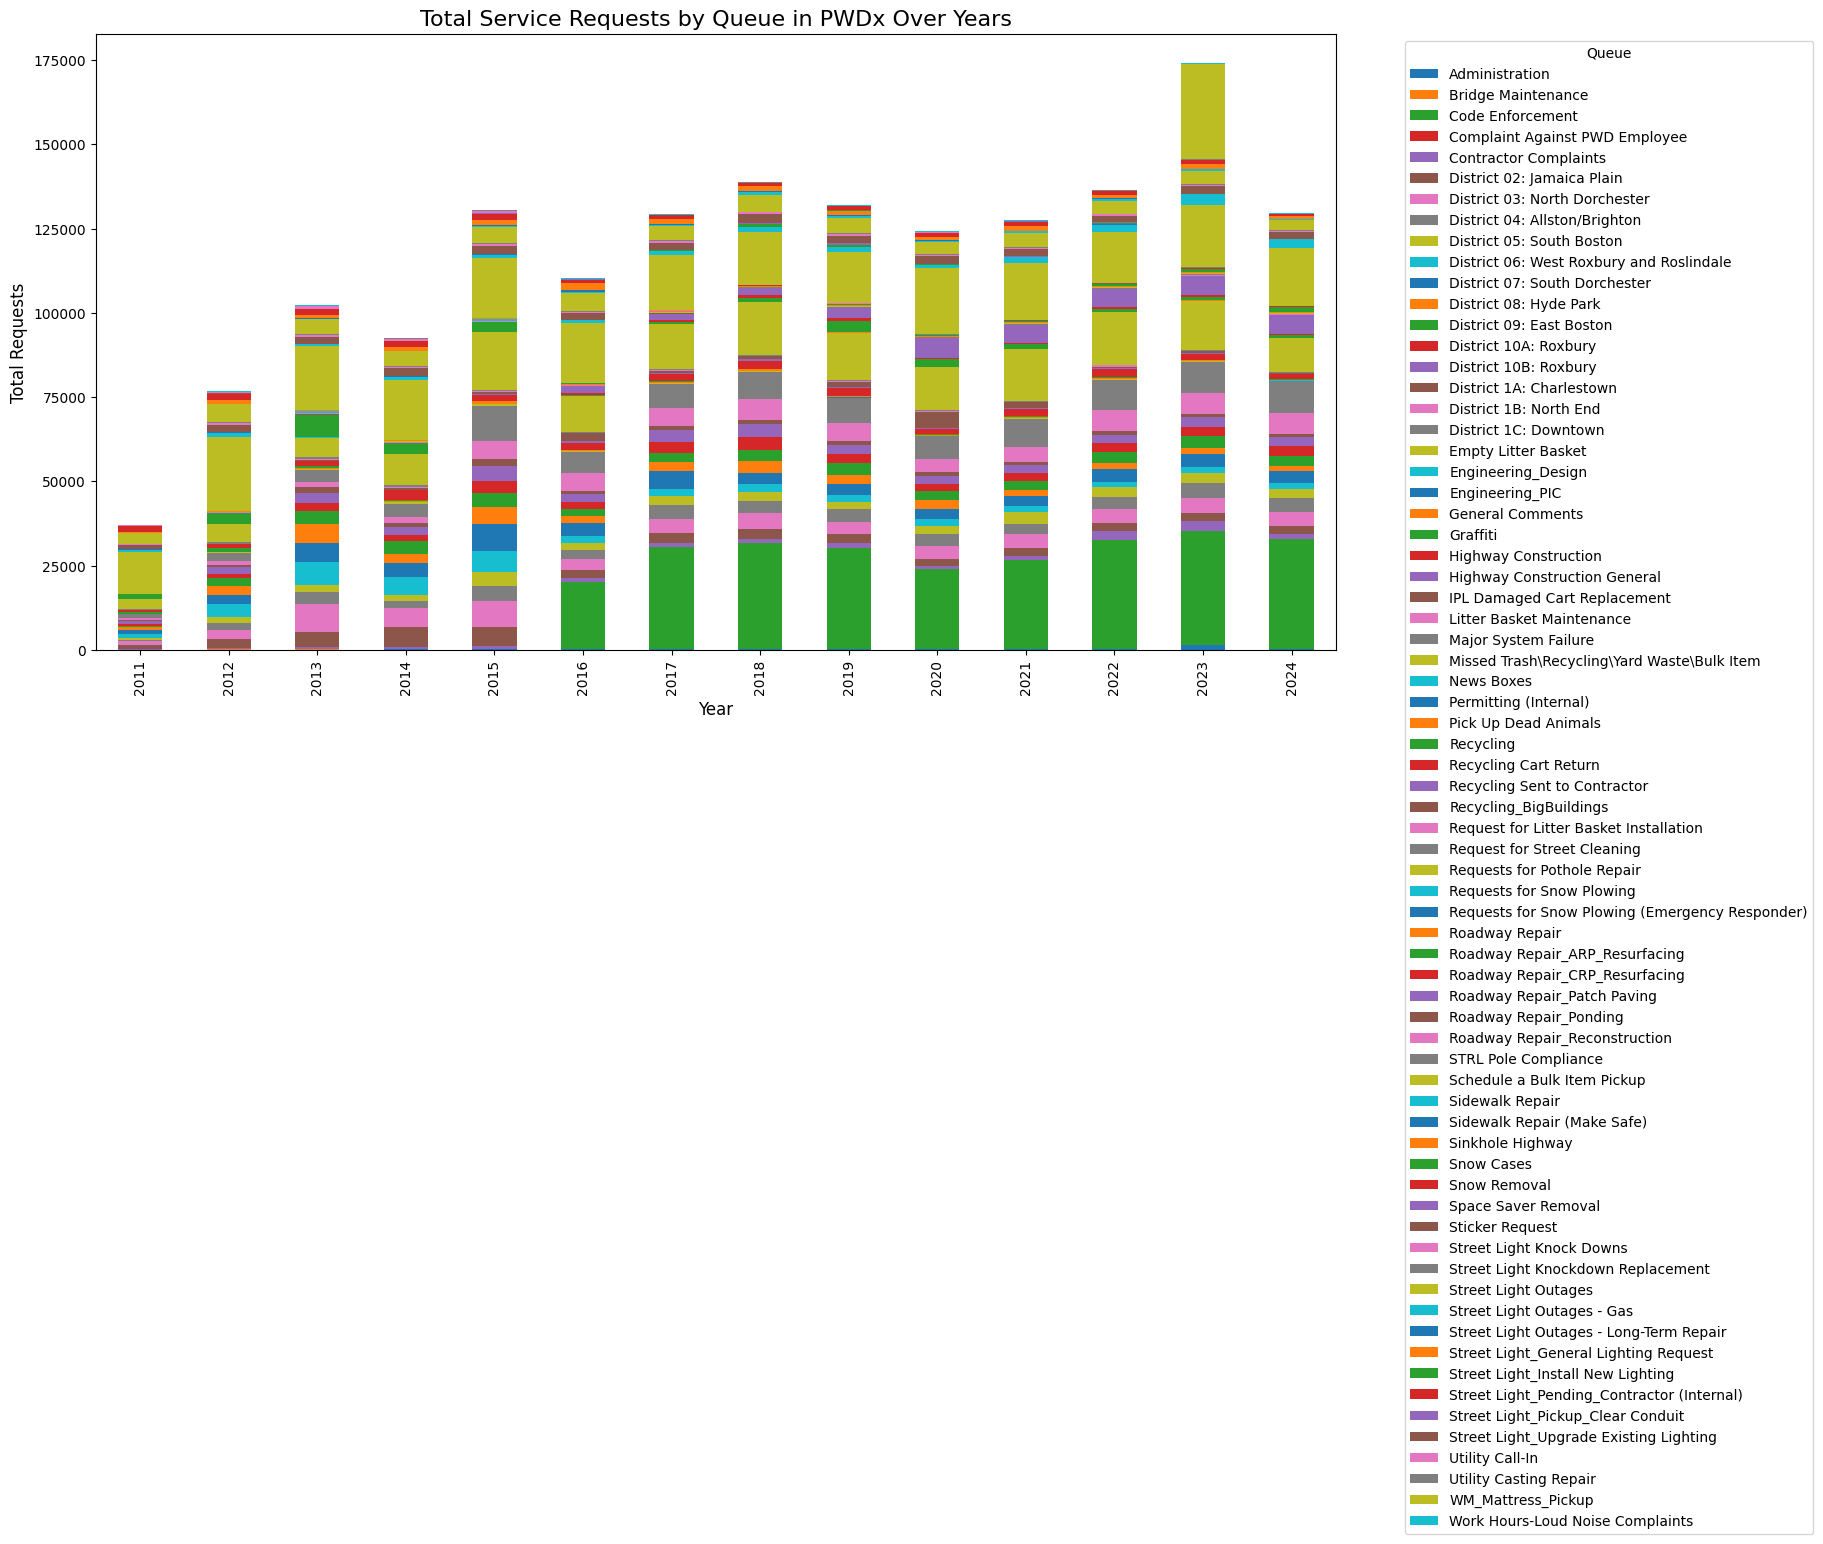

<Figure size 1200x1200 with 0 Axes>

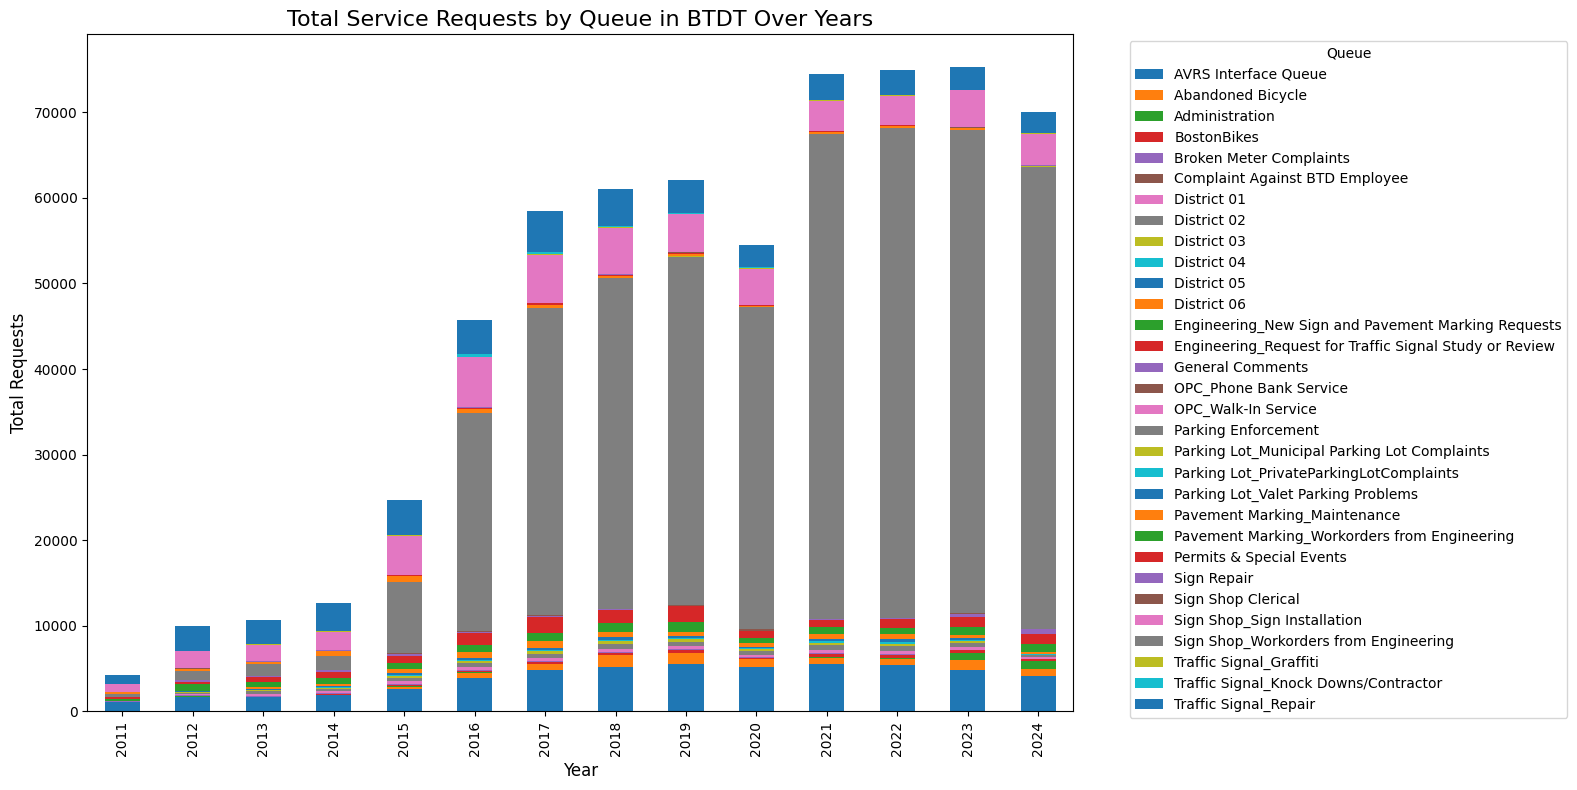

<Figure size 1200x1200 with 0 Axes>

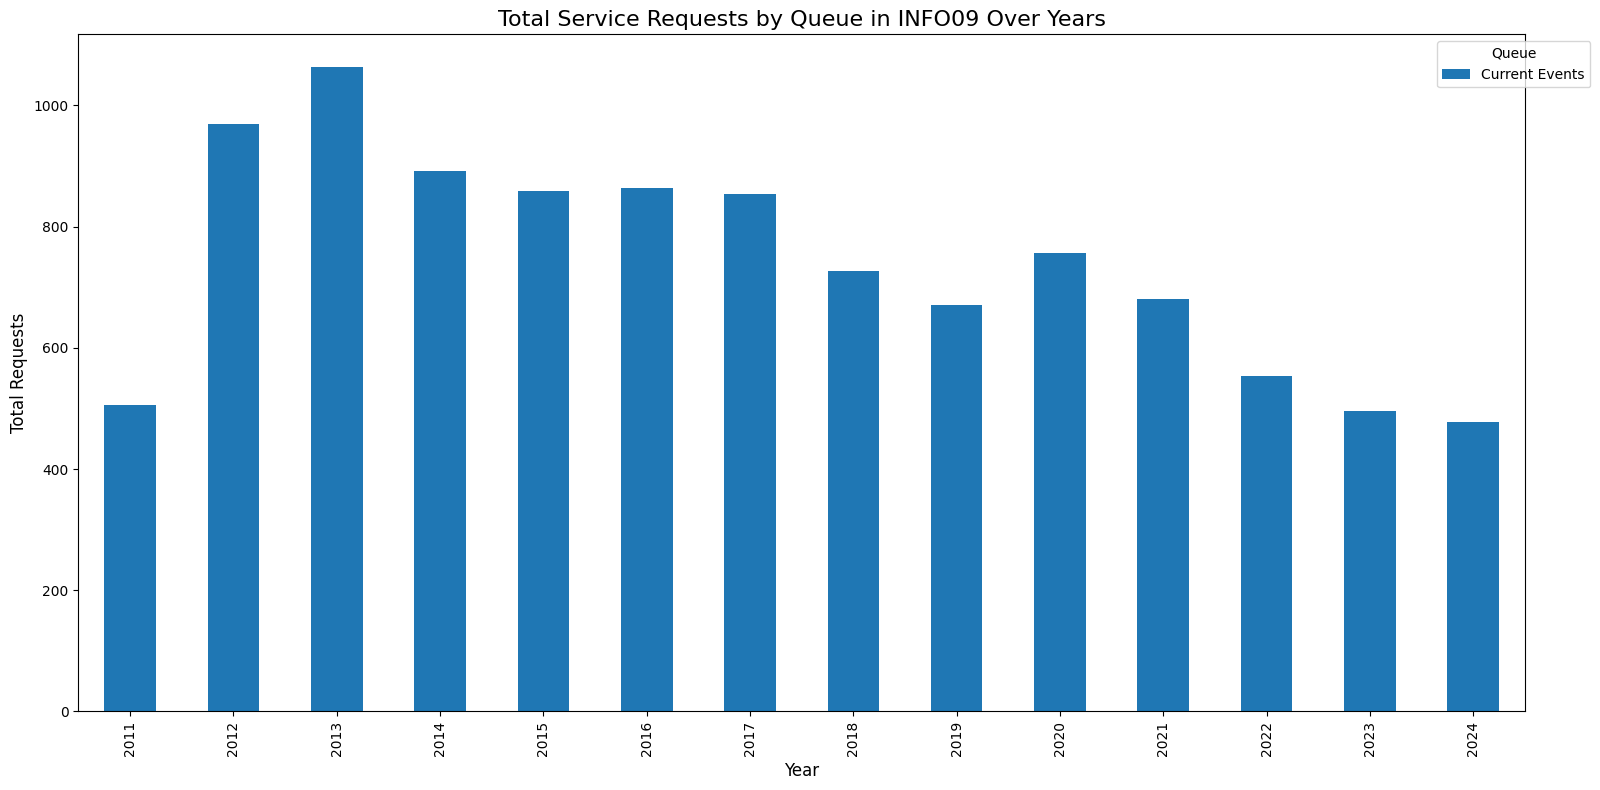

<Figure size 1200x1200 with 0 Axes>

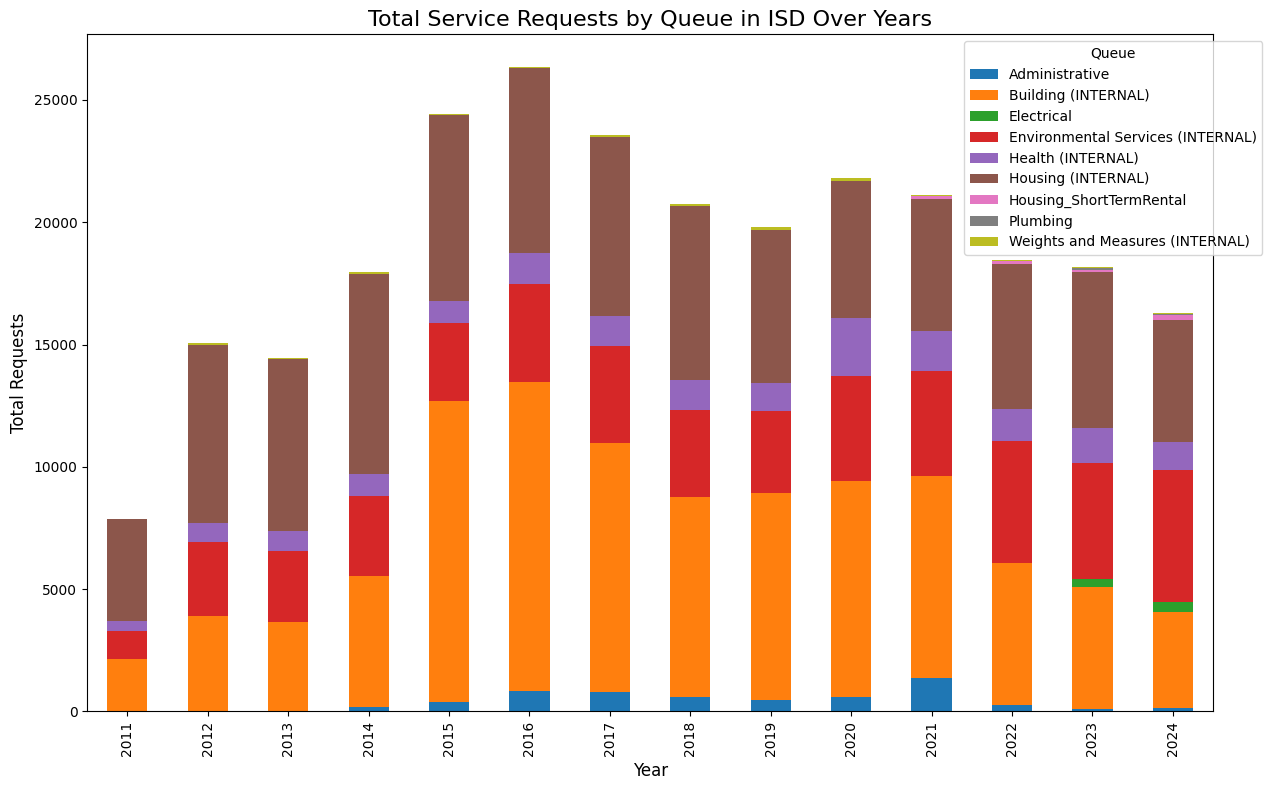

<Figure size 1200x1200 with 0 Axes>

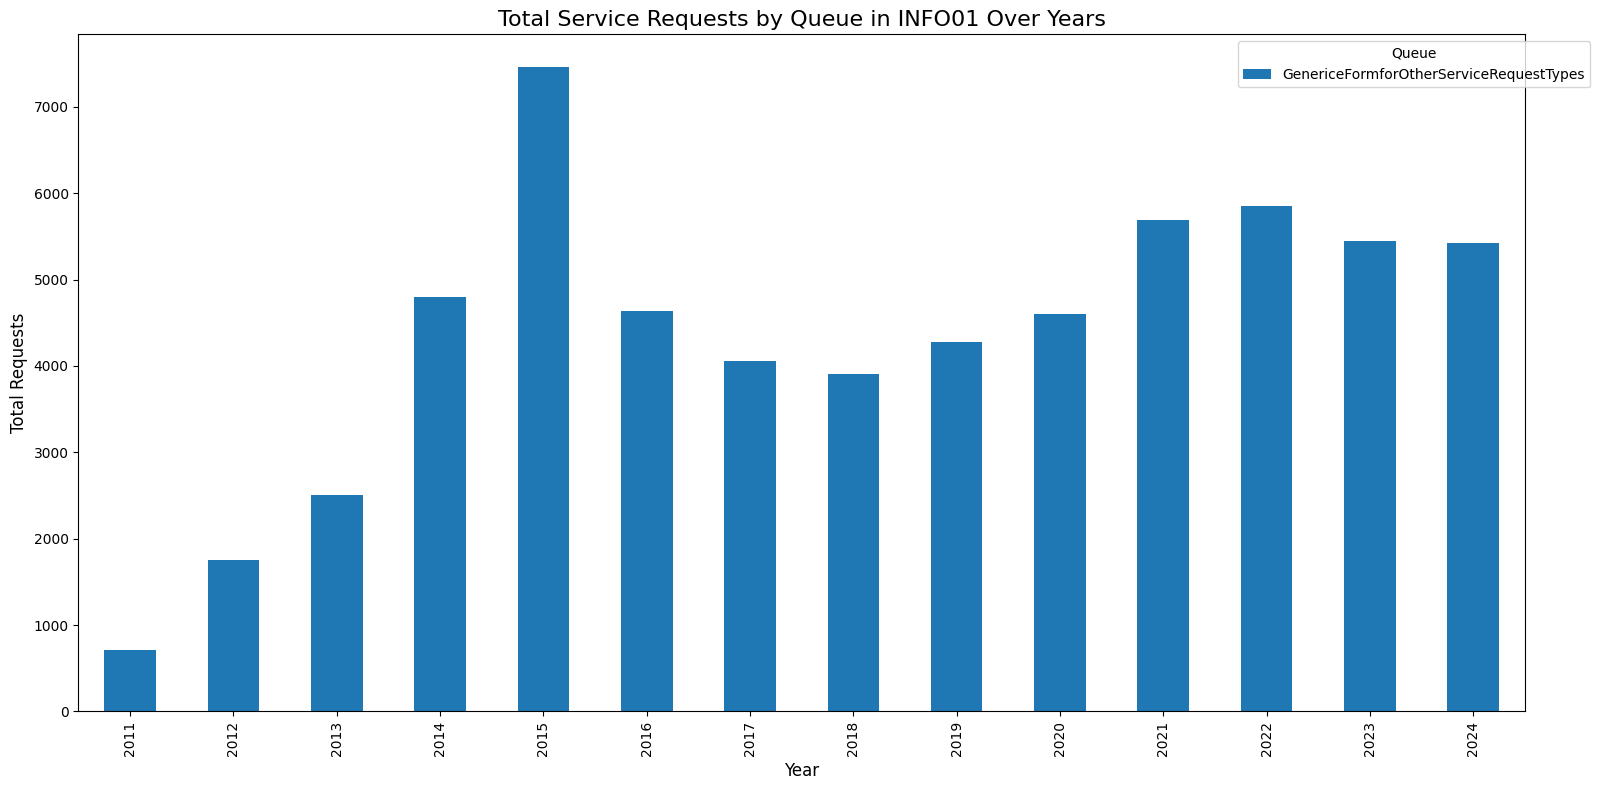

<Figure size 1200x1200 with 0 Axes>

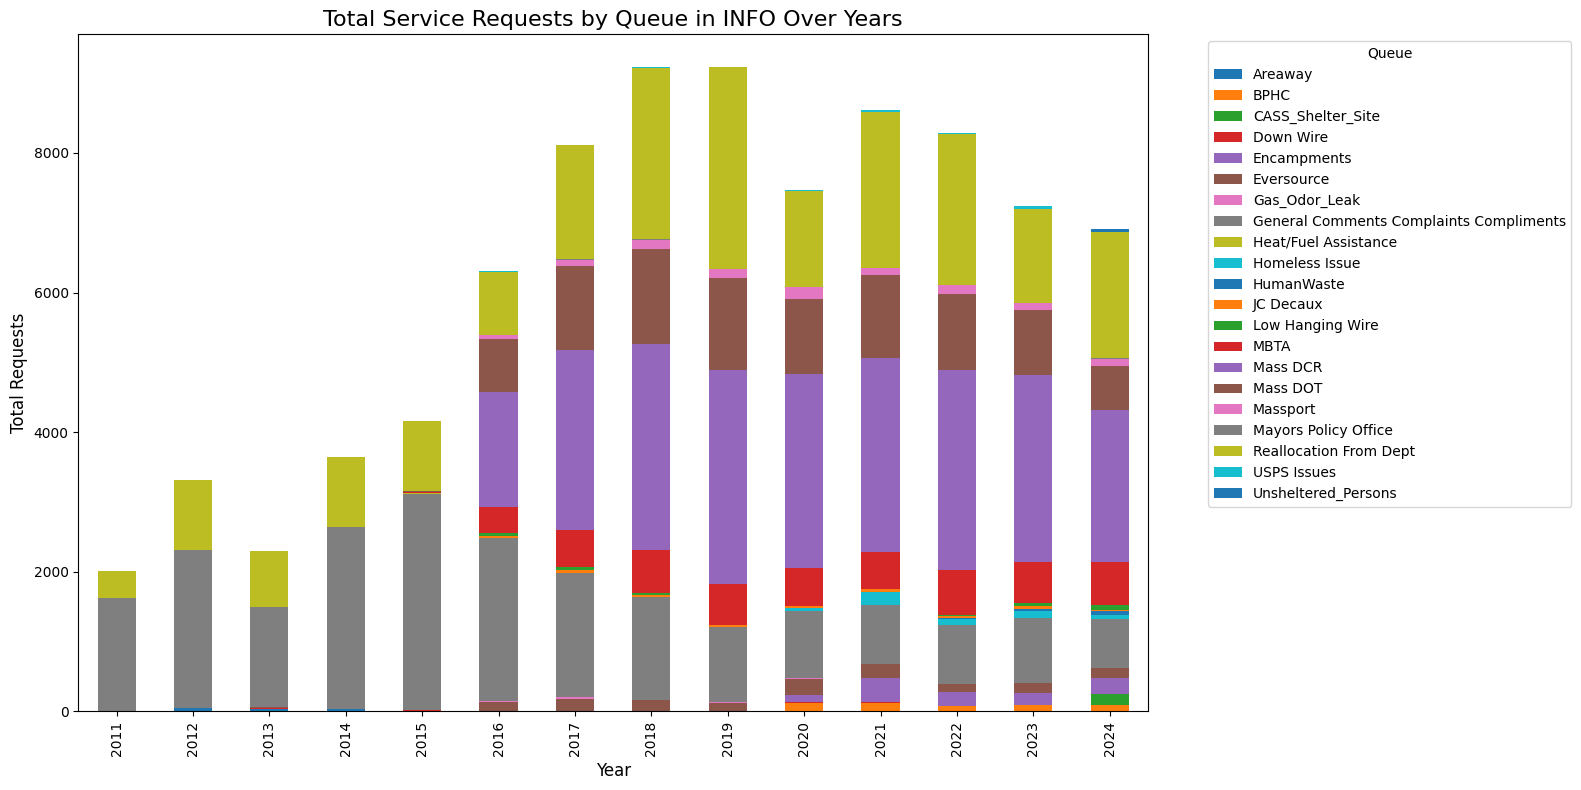

<Figure size 1200x1200 with 0 Axes>

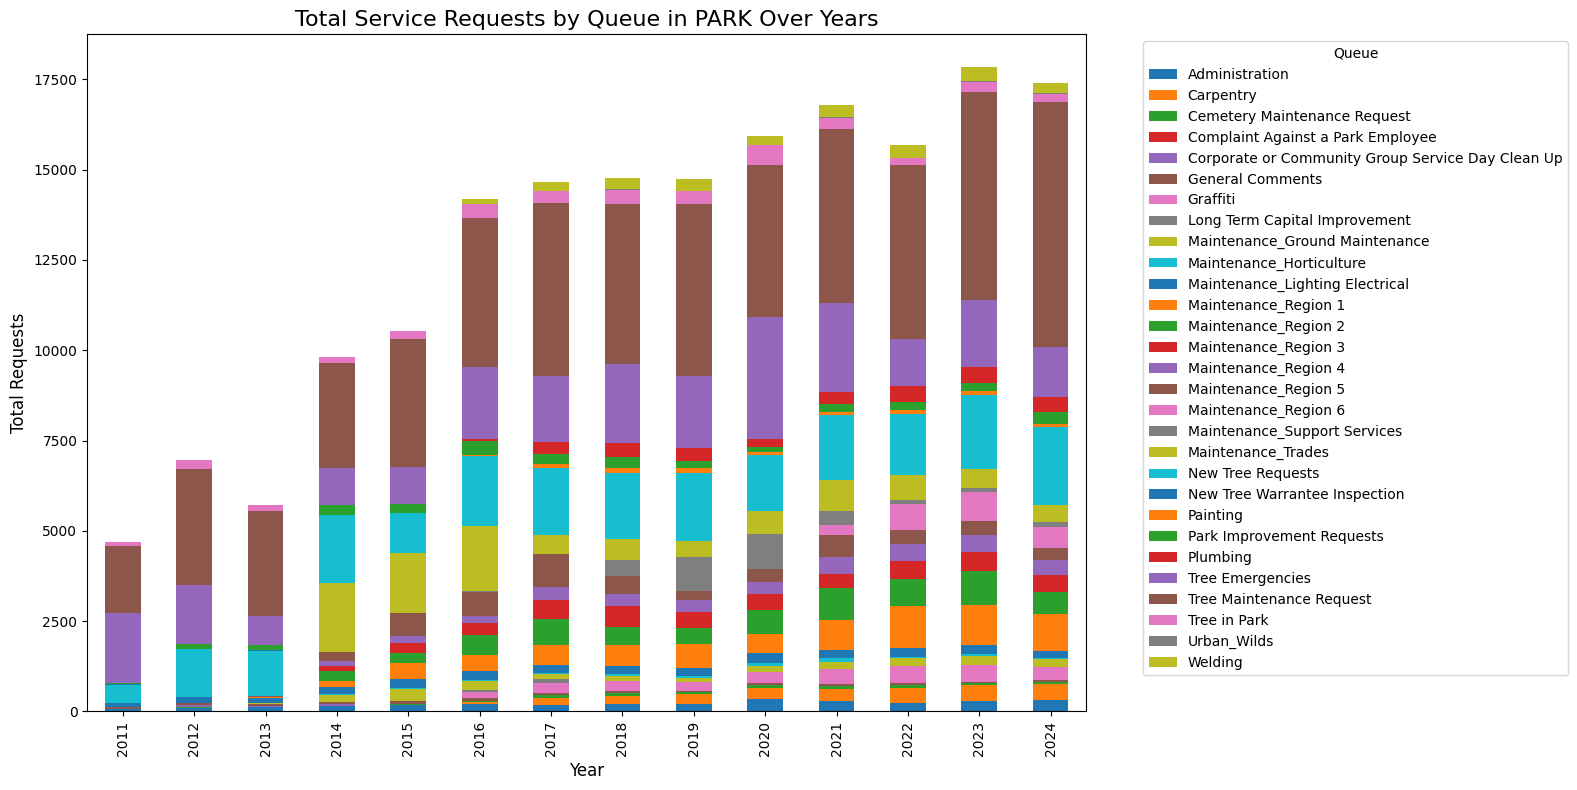

<Figure size 1200x1200 with 0 Axes>

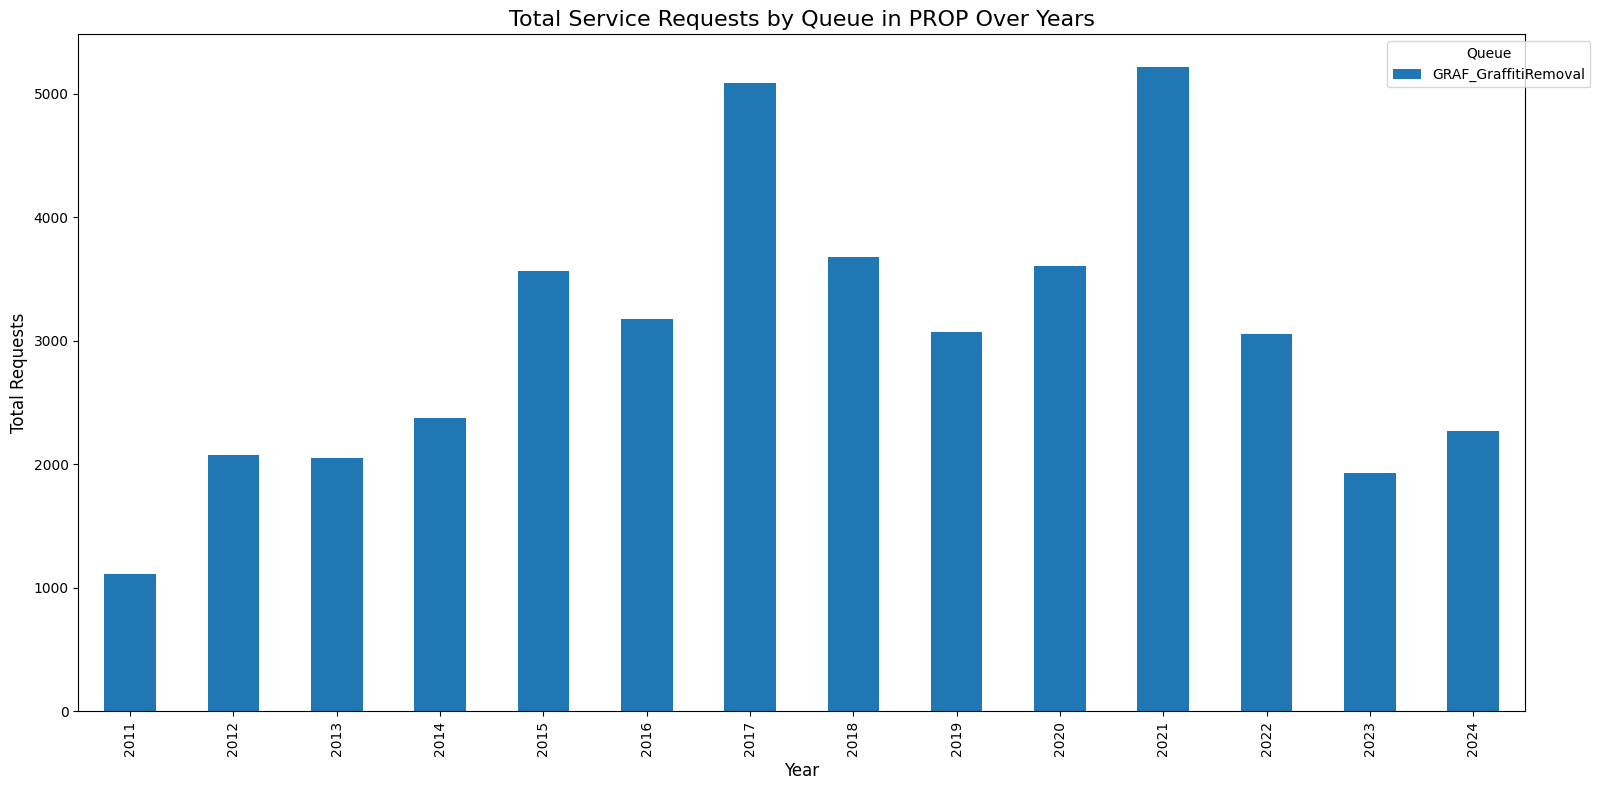

<Figure size 1200x1200 with 0 Axes>

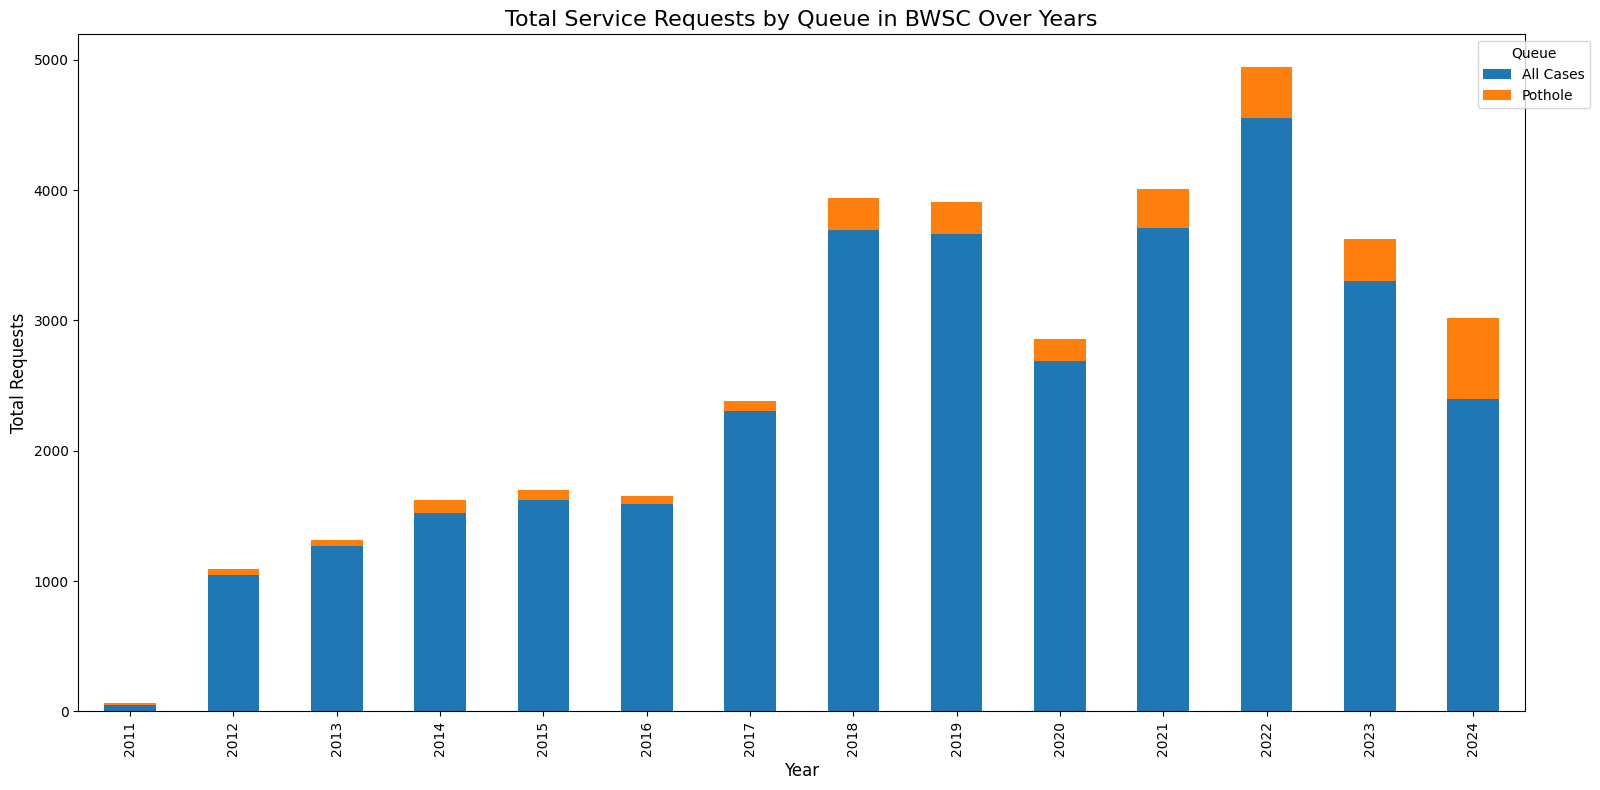

<Figure size 1200x1200 with 0 Axes>

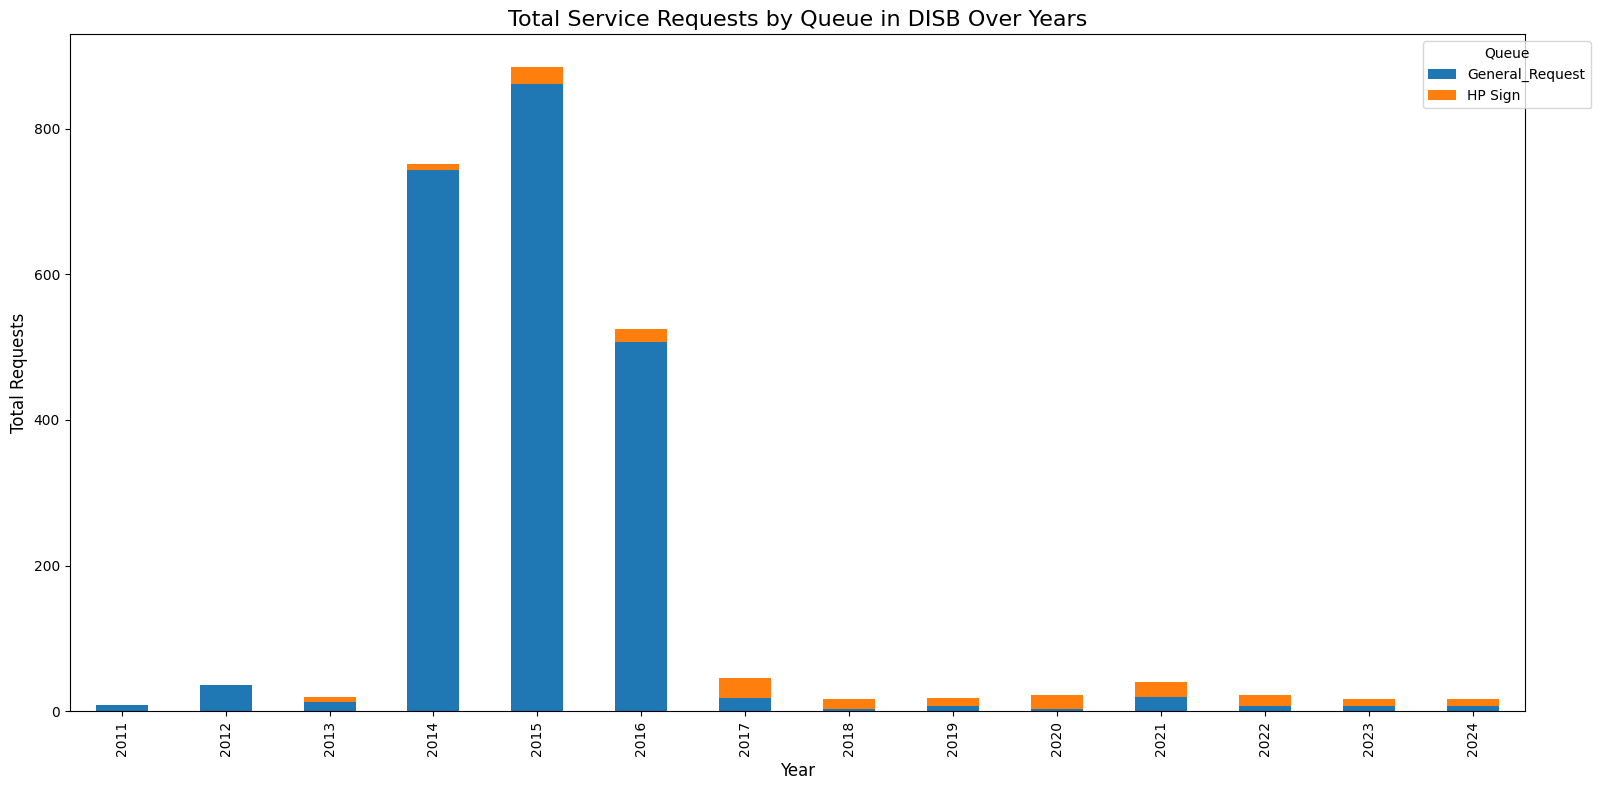

<Figure size 1200x1200 with 0 Axes>

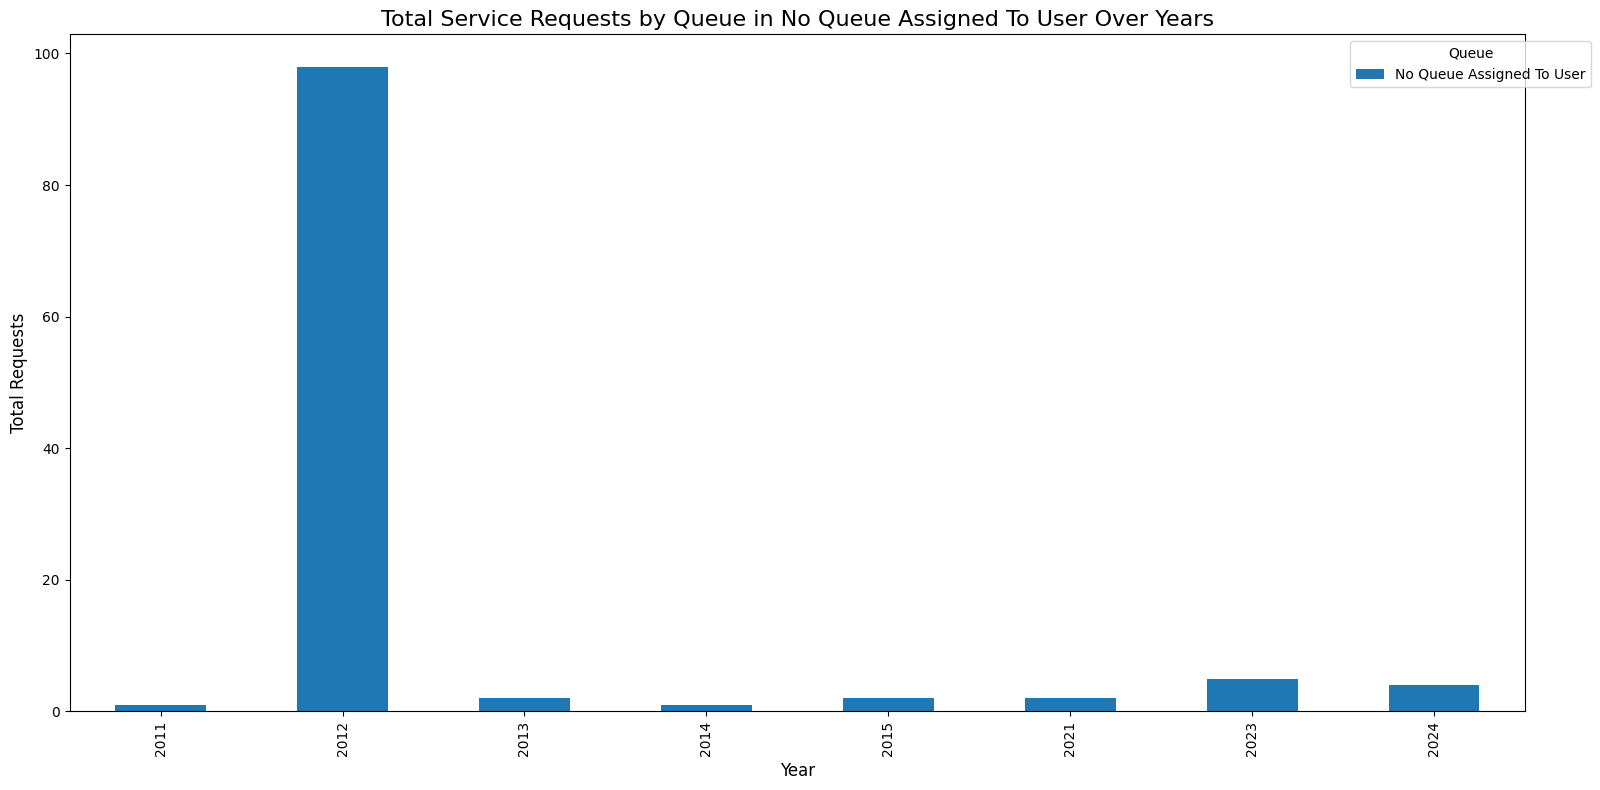

<Figure size 1200x1200 with 0 Axes>

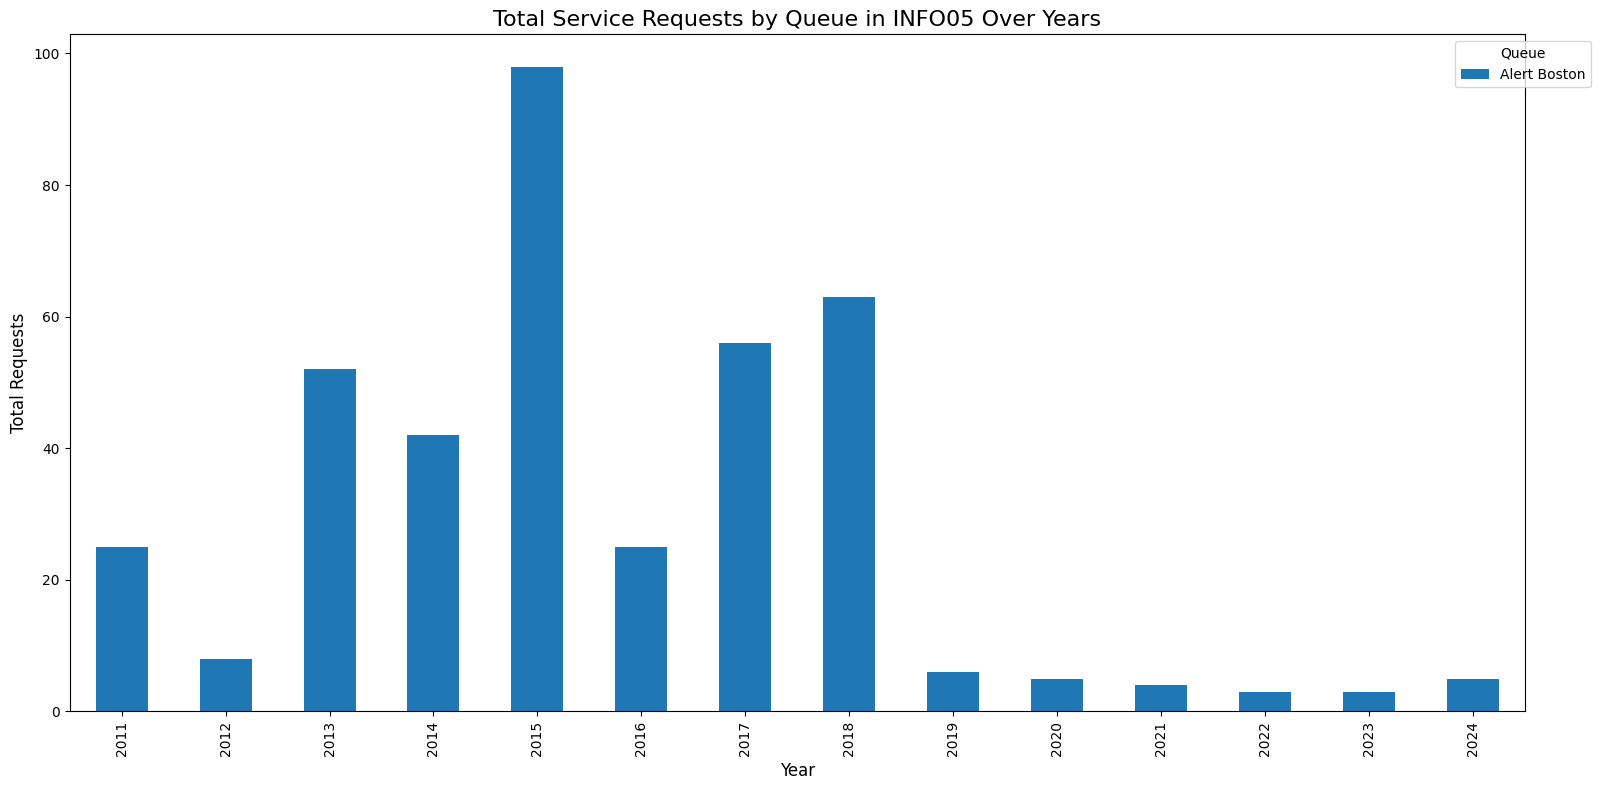

<Figure size 1200x1200 with 0 Axes>

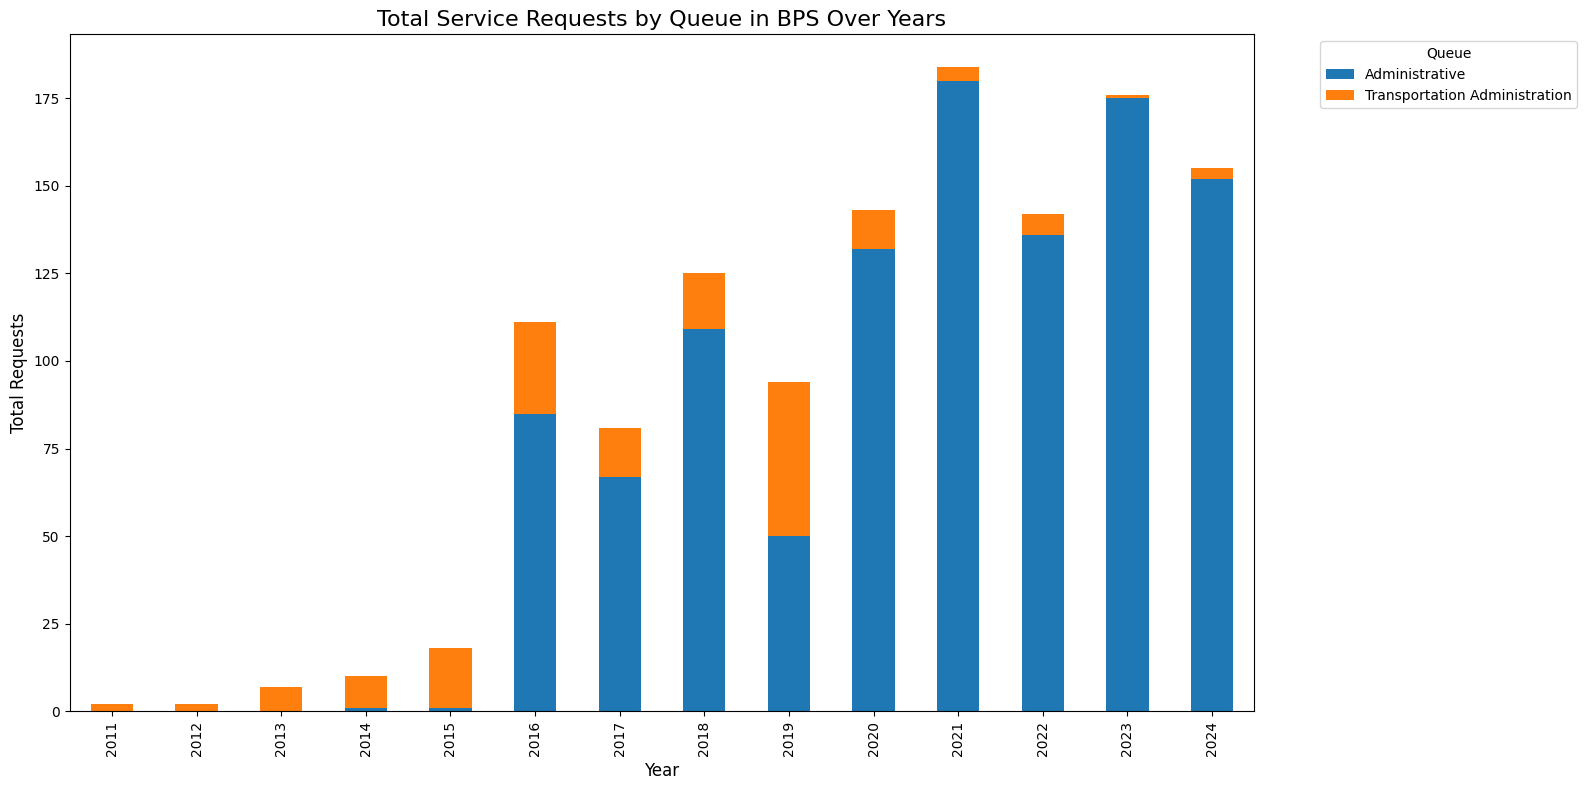

<Figure size 1200x1200 with 0 Axes>

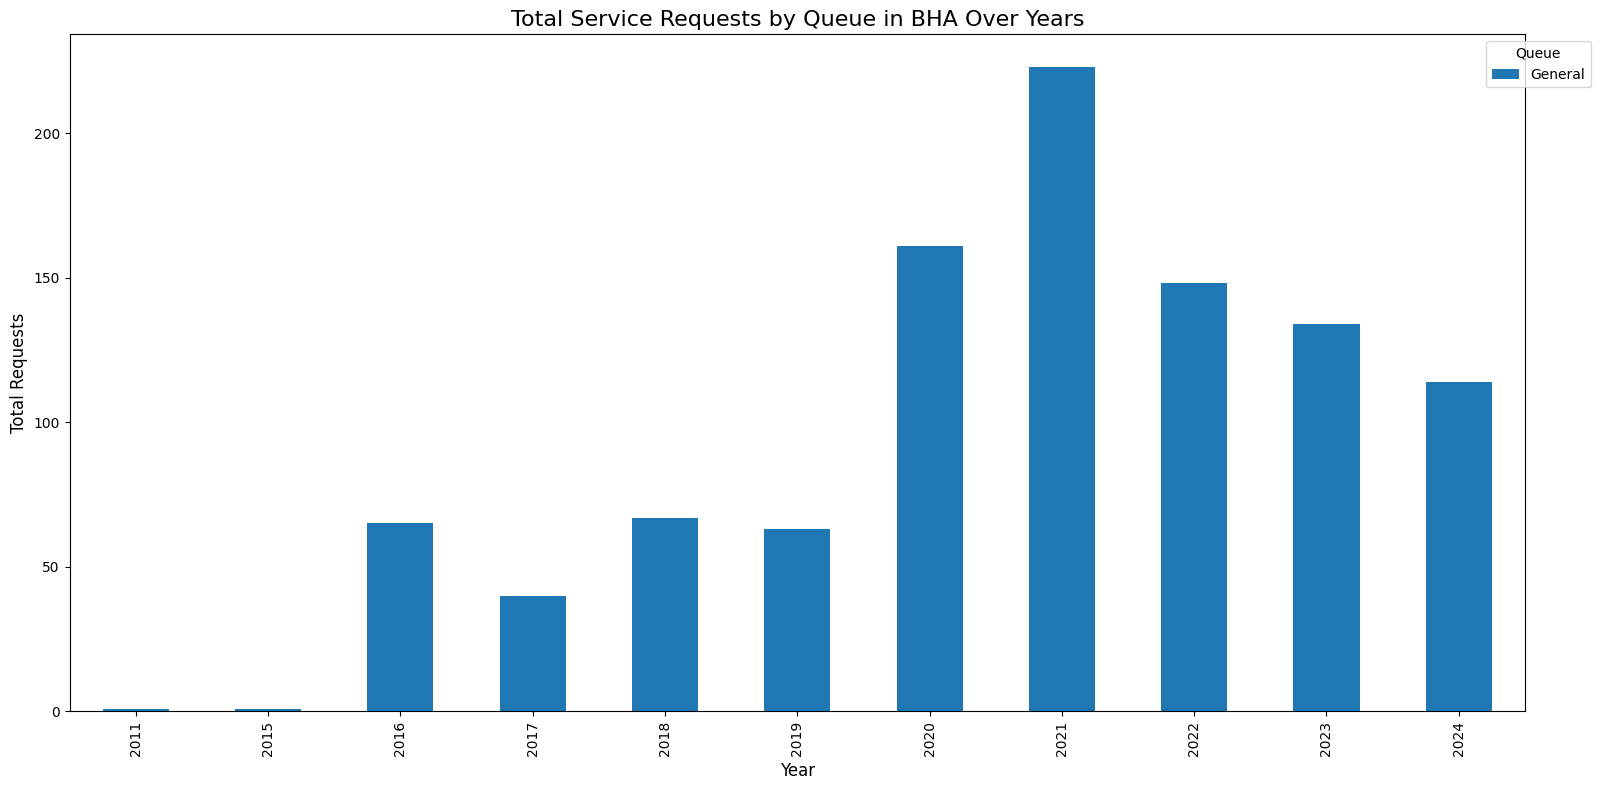

<Figure size 1200x1200 with 0 Axes>

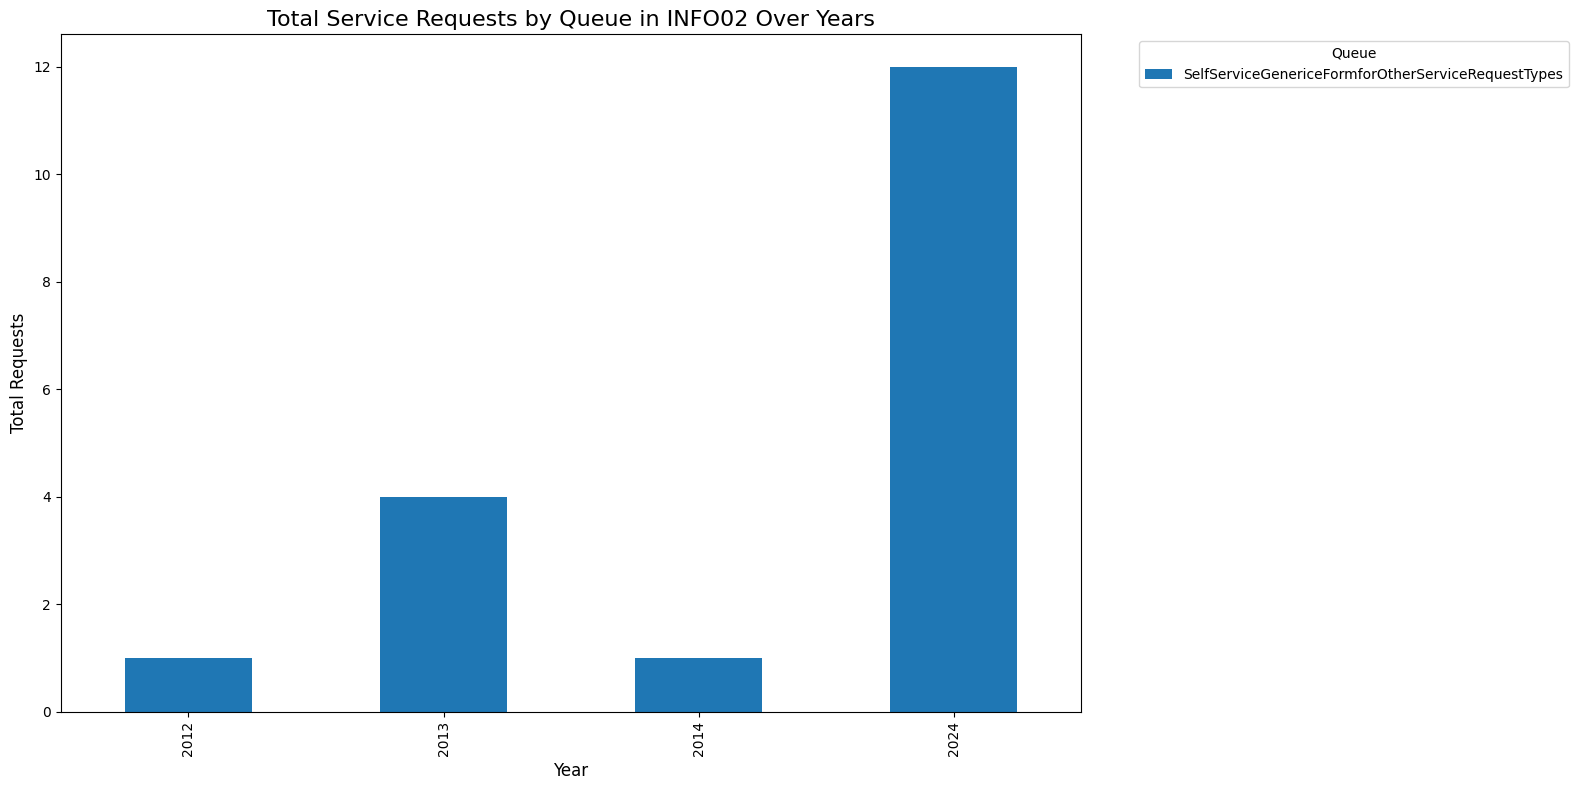

<Figure size 1200x1200 with 0 Axes>

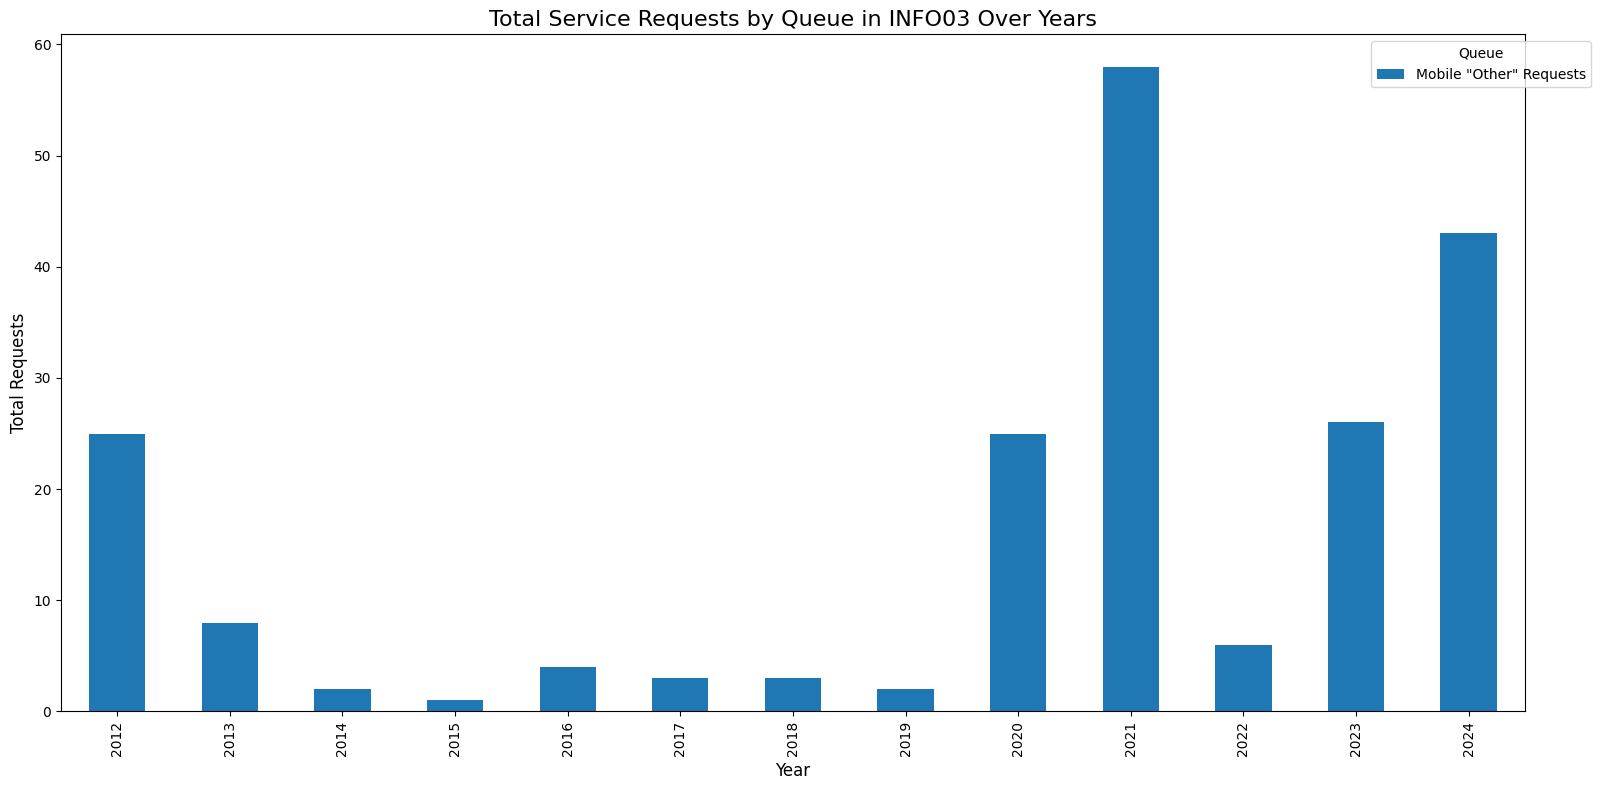

<Figure size 1200x1200 with 0 Axes>

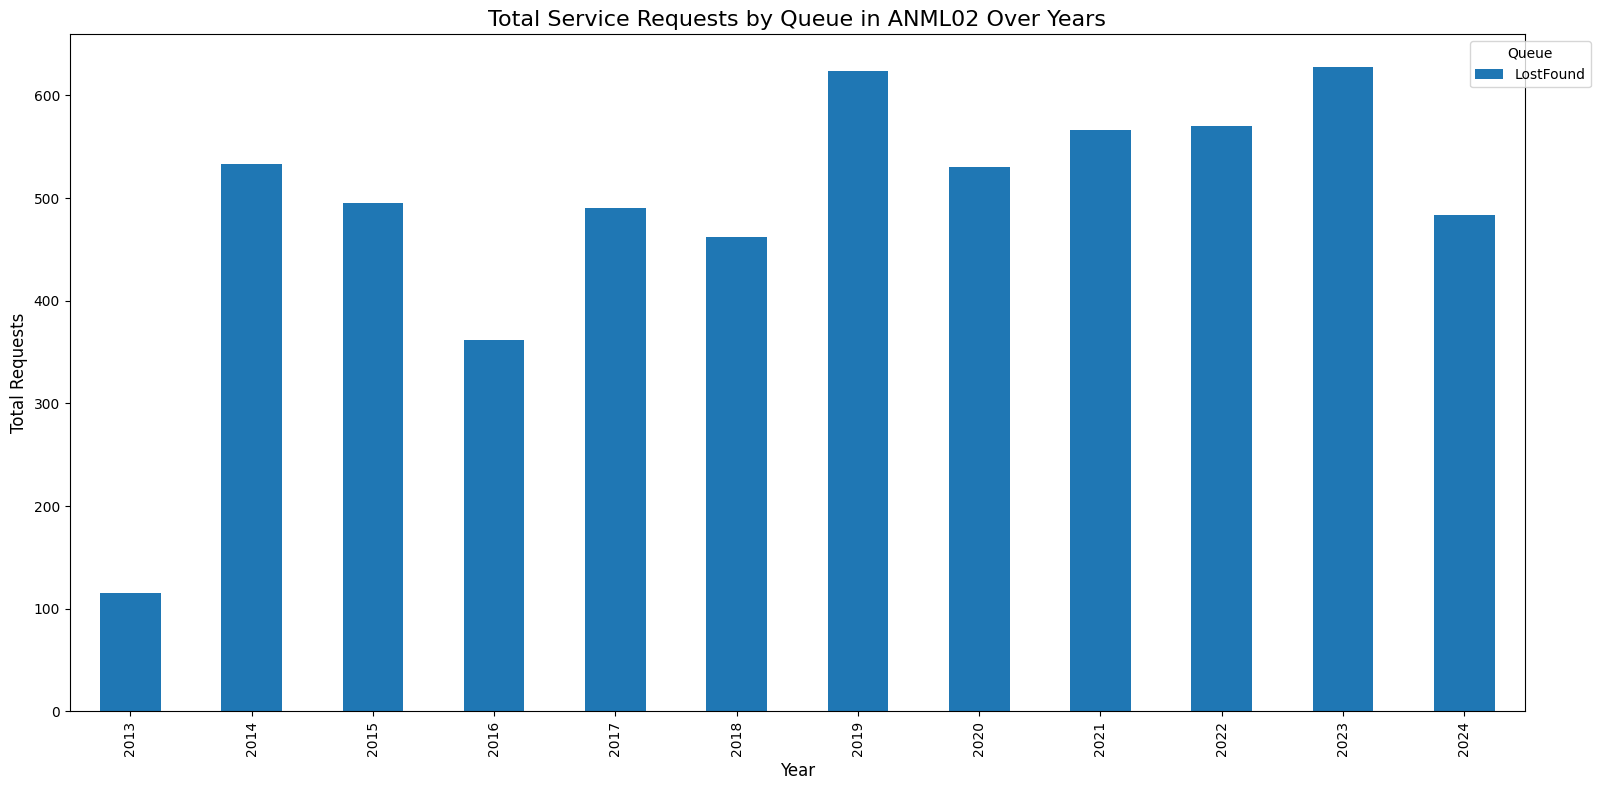

<Figure size 1200x1200 with 0 Axes>

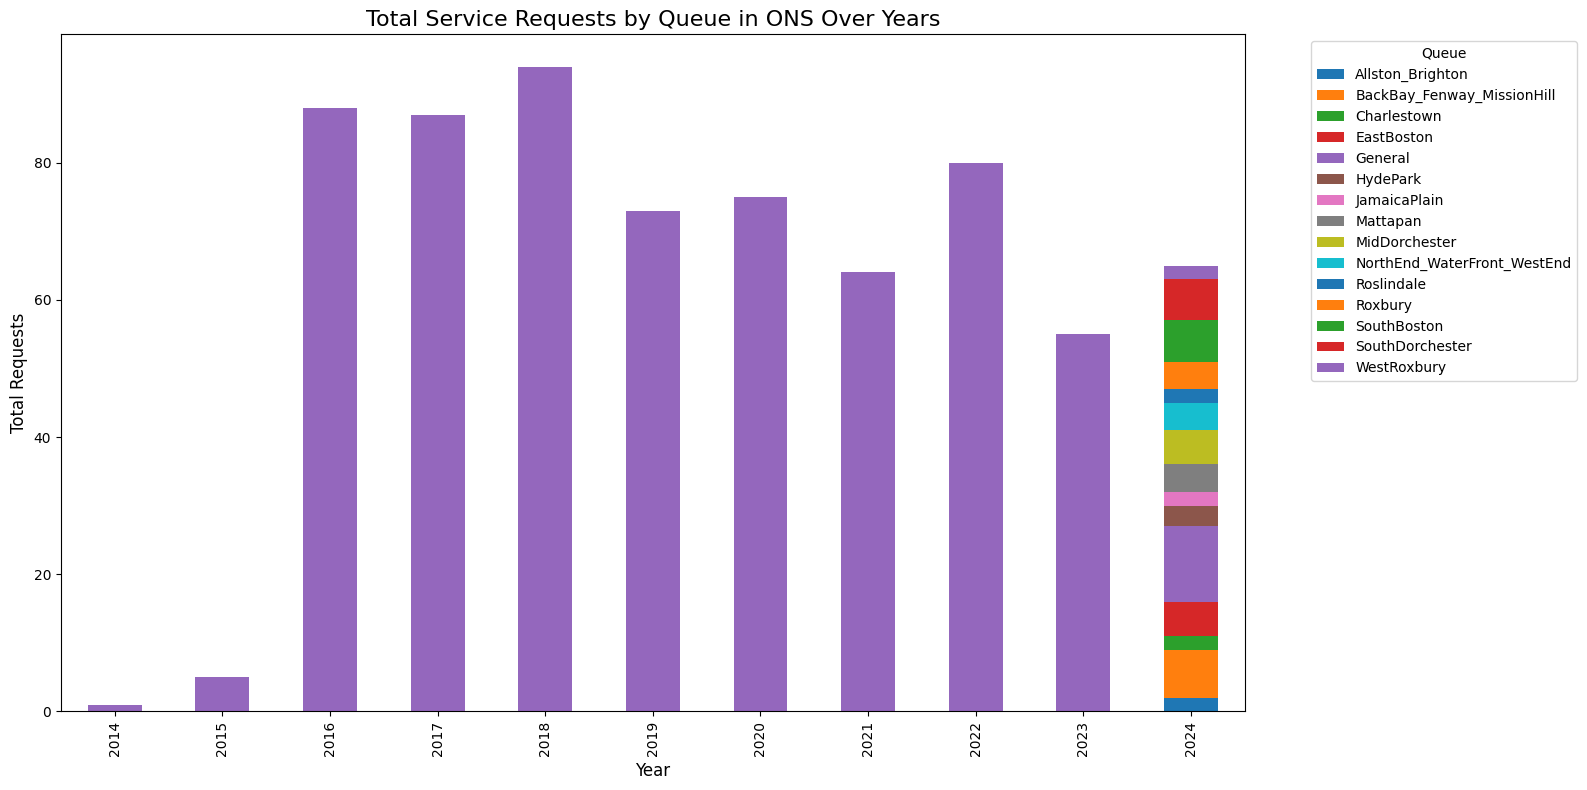

<Figure size 1200x1200 with 0 Axes>

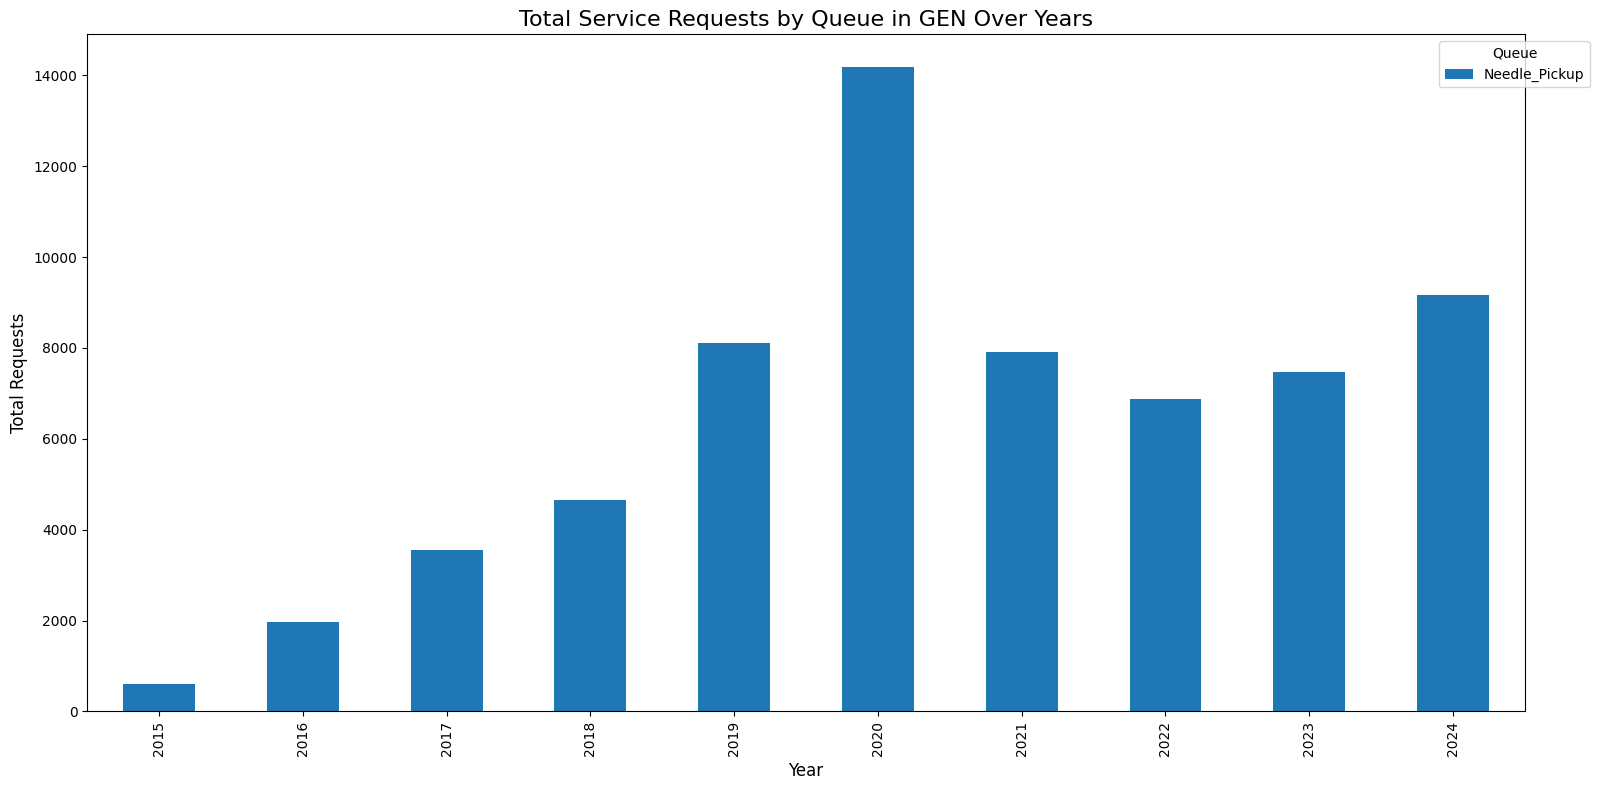

<Figure size 1200x1200 with 0 Axes>

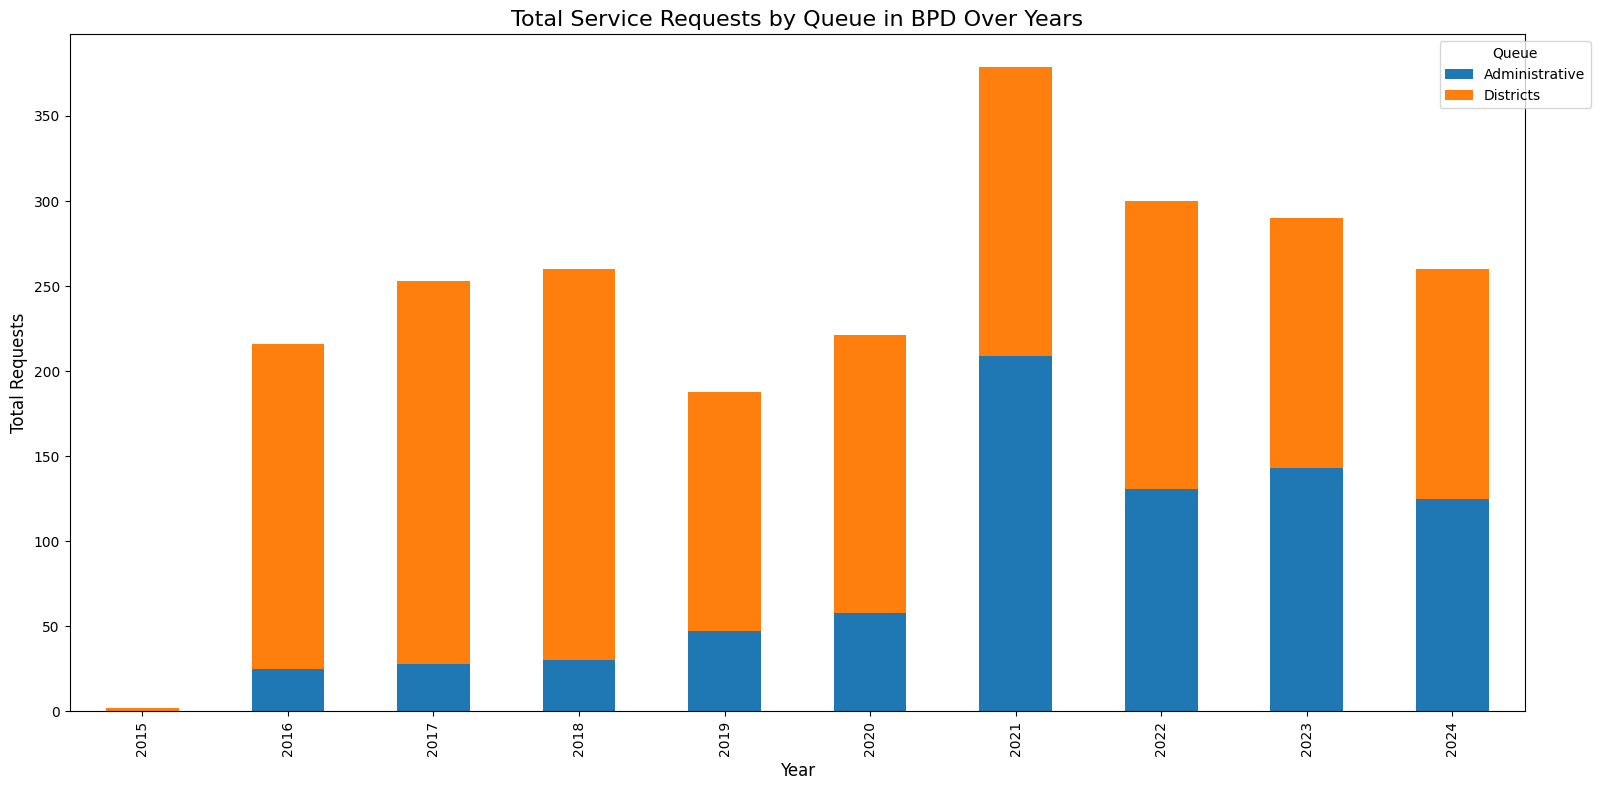

<Figure size 1200x1200 with 0 Axes>

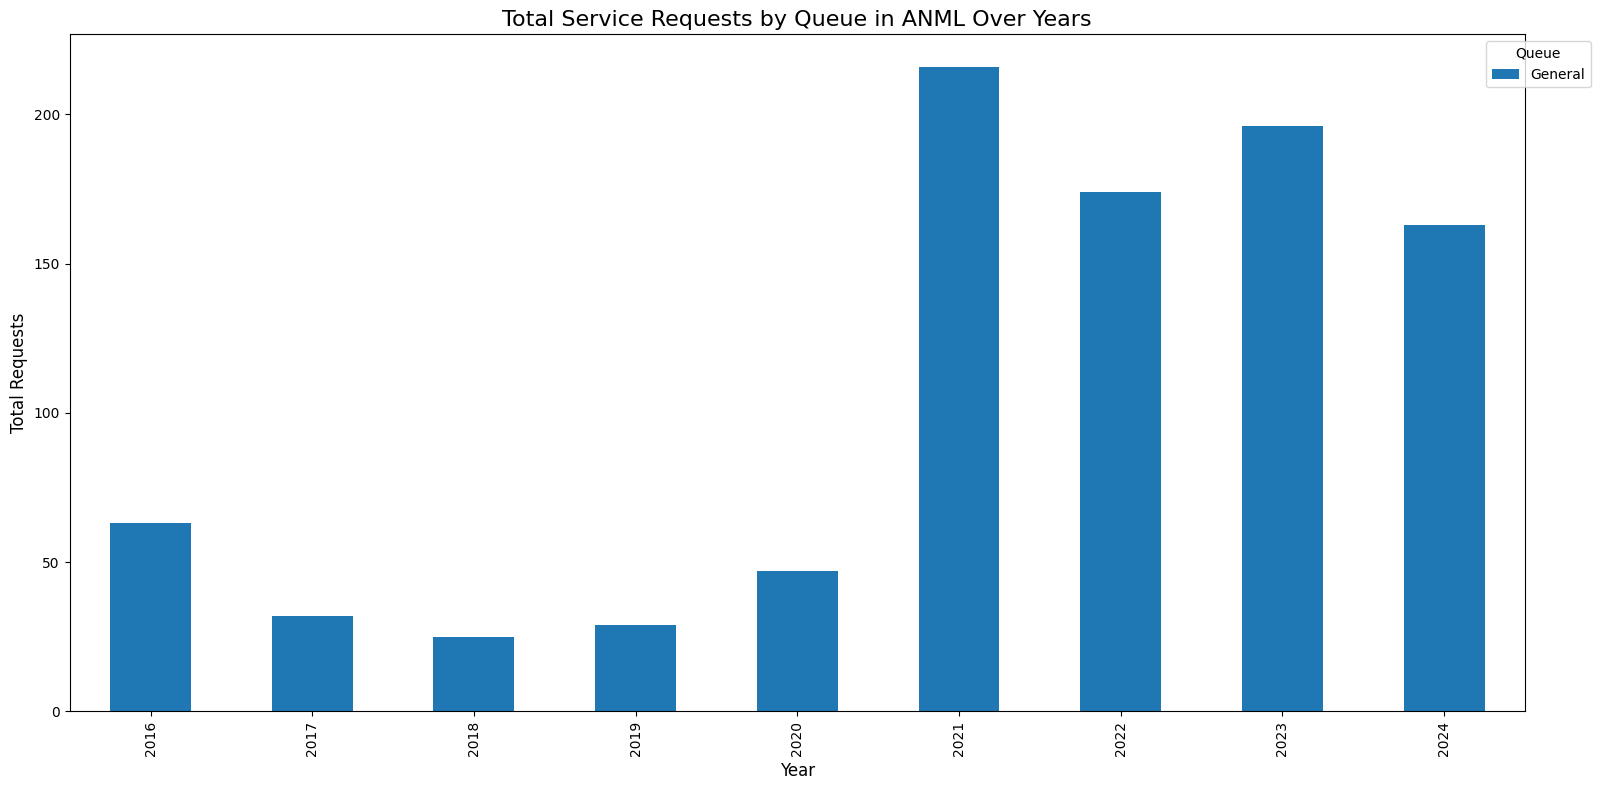

<Figure size 1200x1200 with 0 Axes>

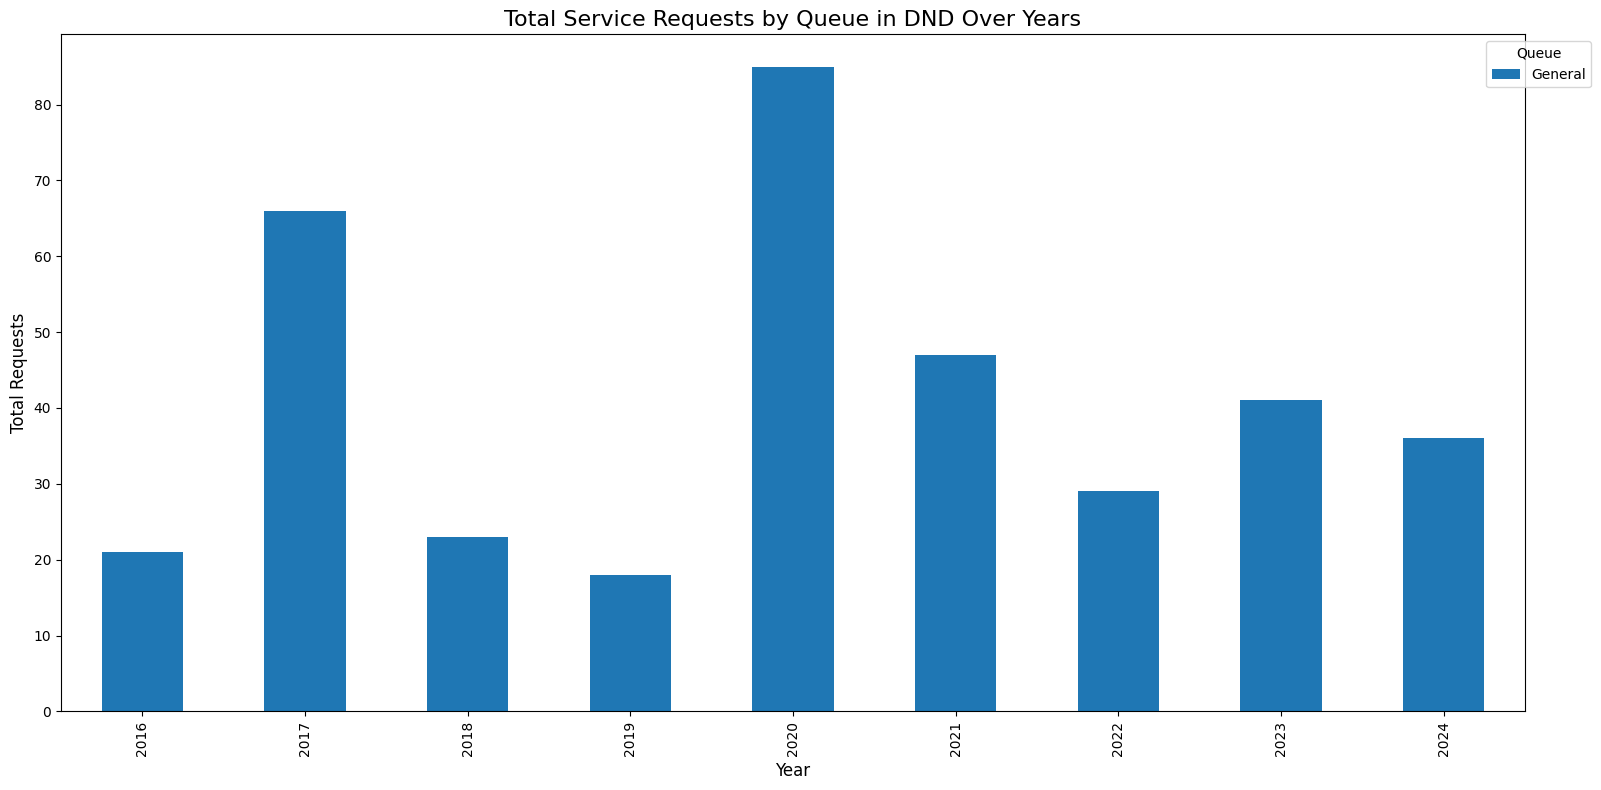

<Figure size 1200x1200 with 0 Axes>

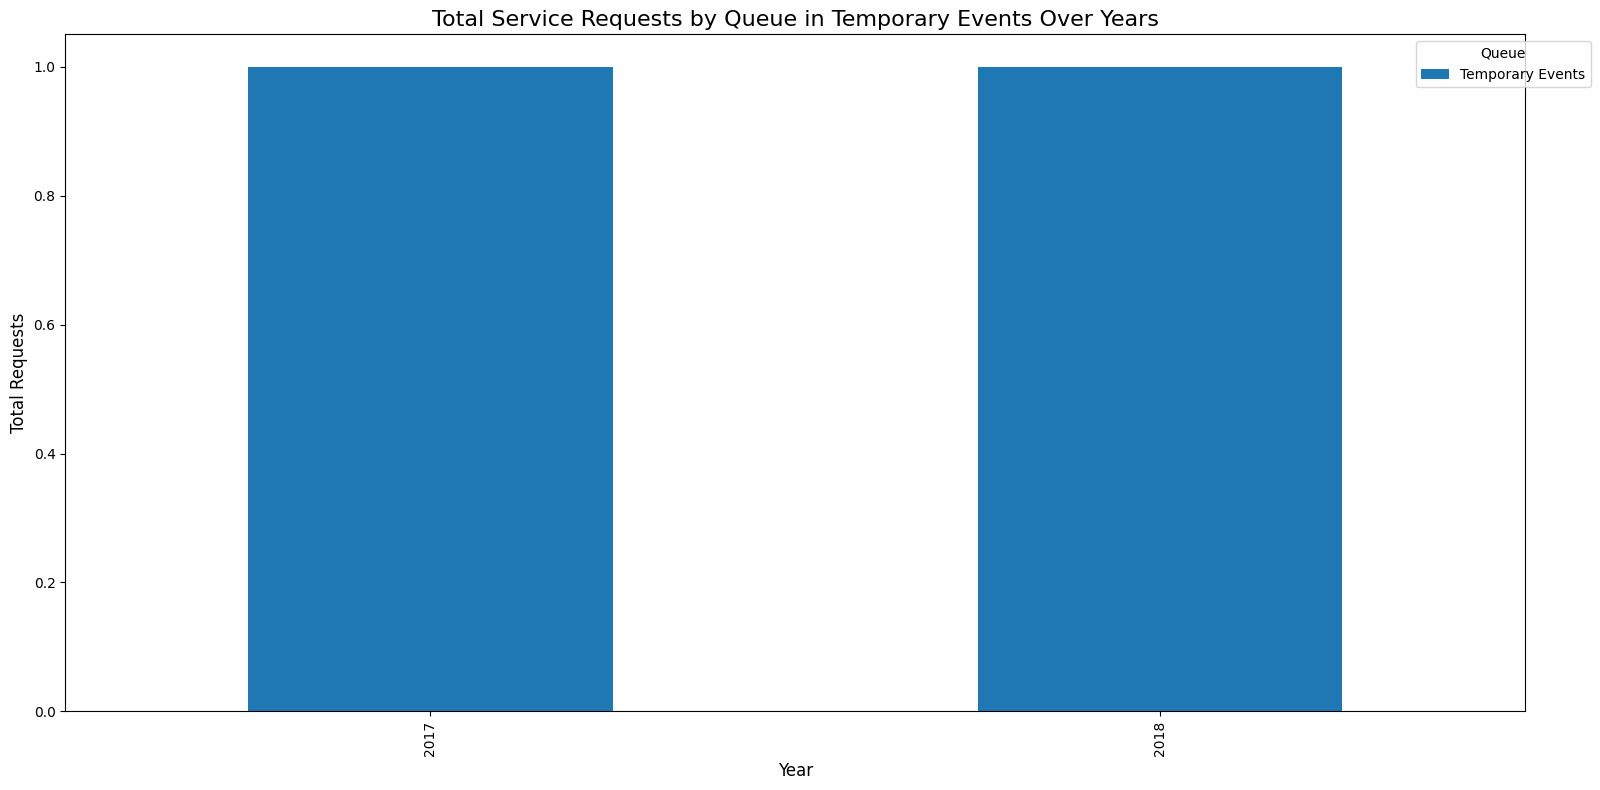

<Figure size 1200x1200 with 0 Axes>

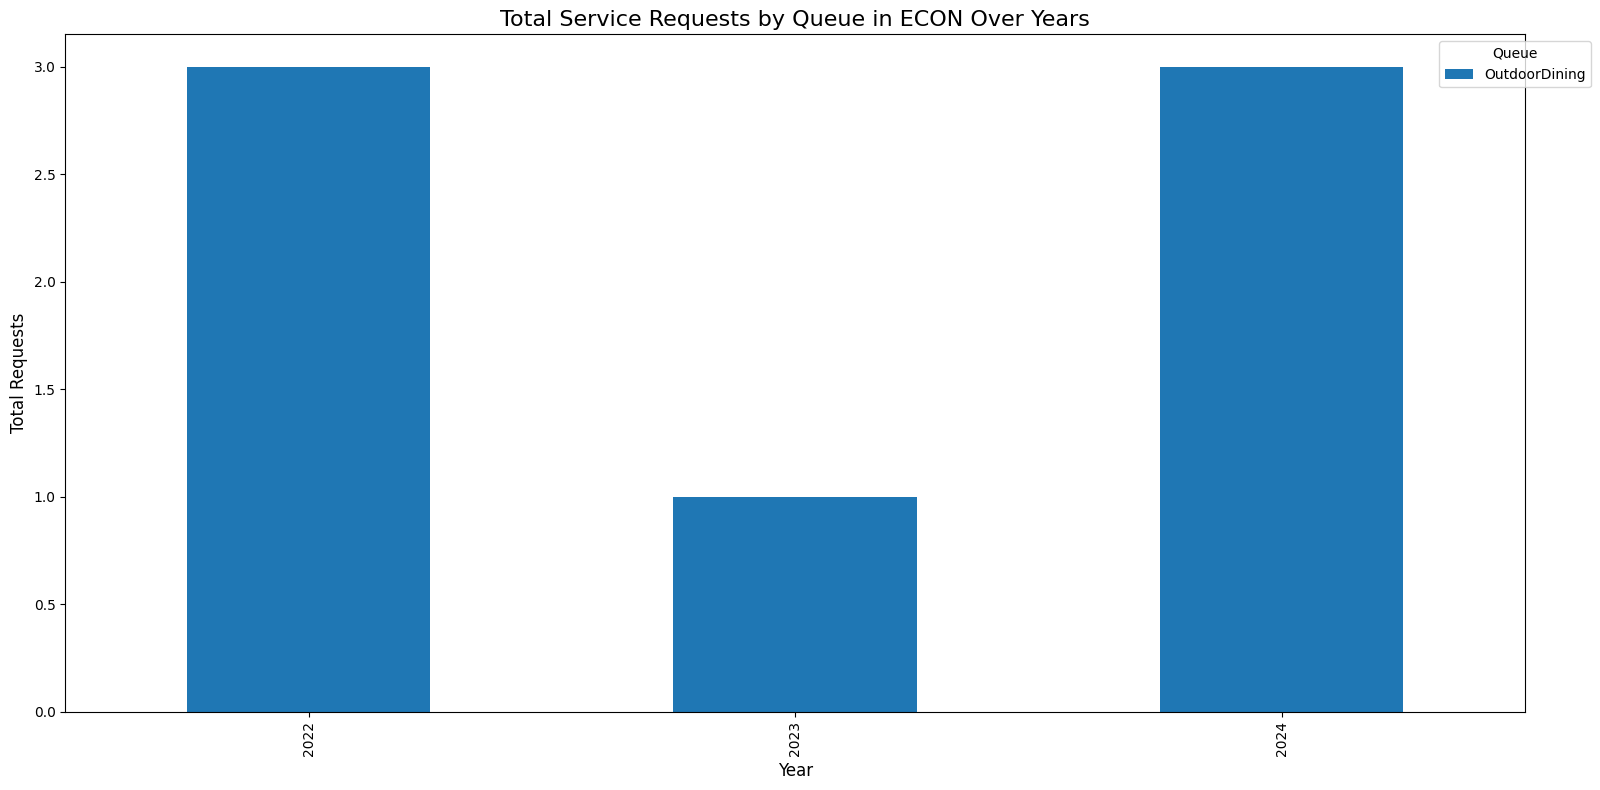

<Figure size 1200x1200 with 0 Axes>

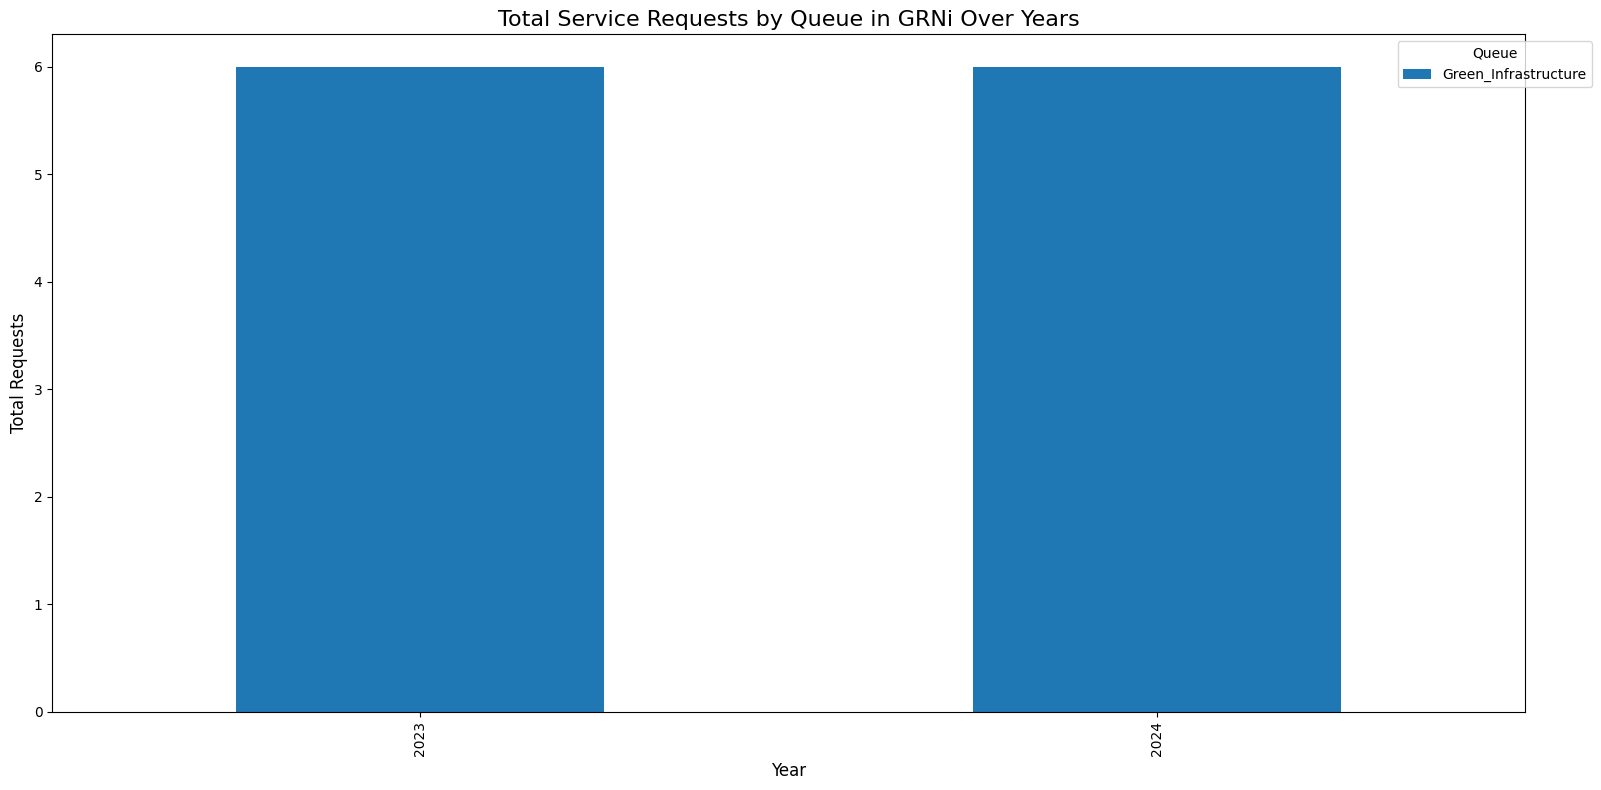

<Figure size 1200x1200 with 0 Axes>

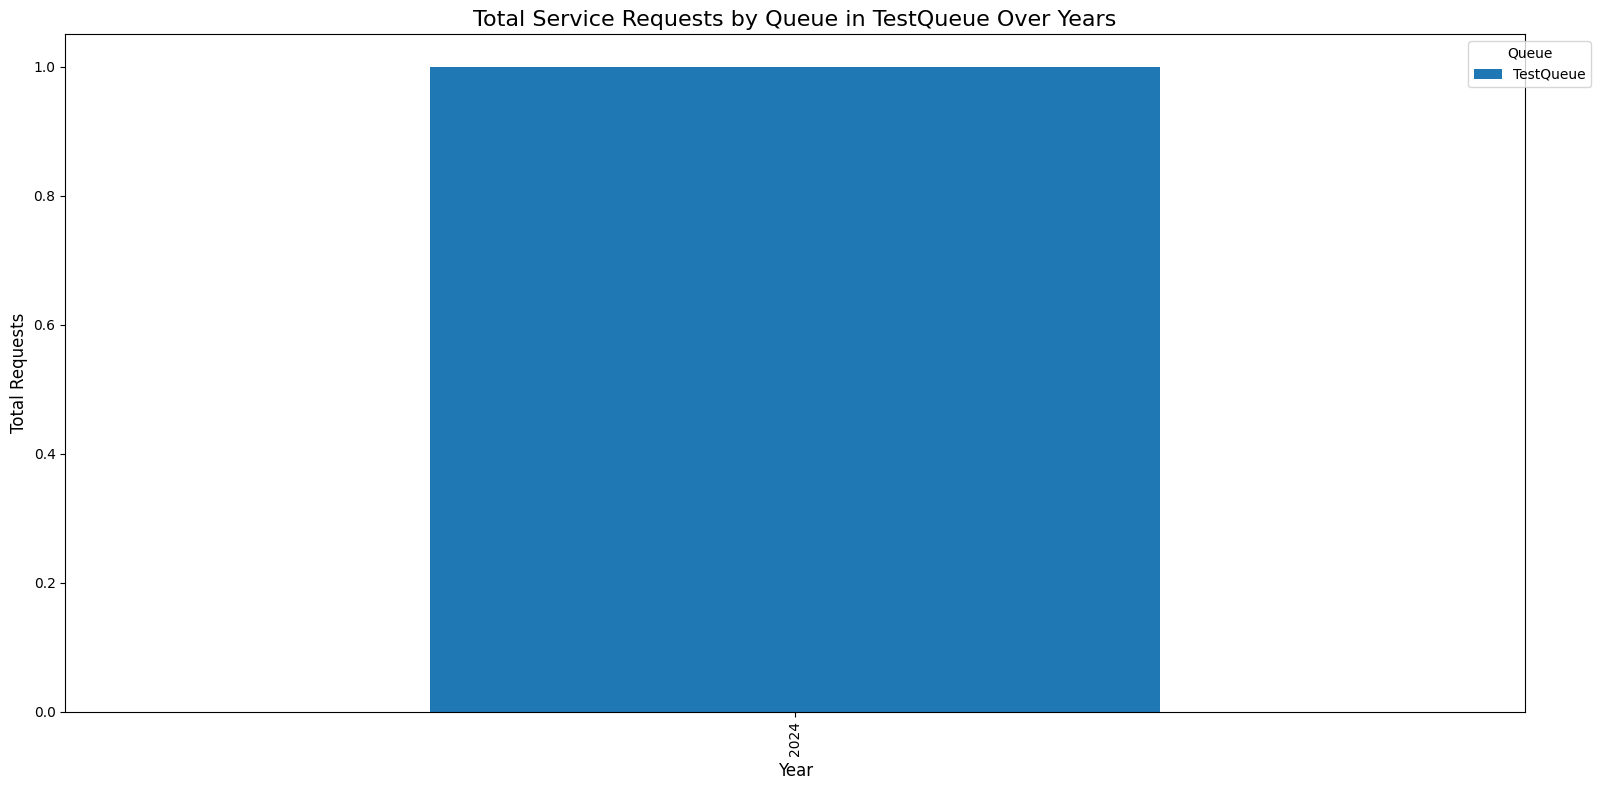

<Figure size 1200x800 with 0 Axes>

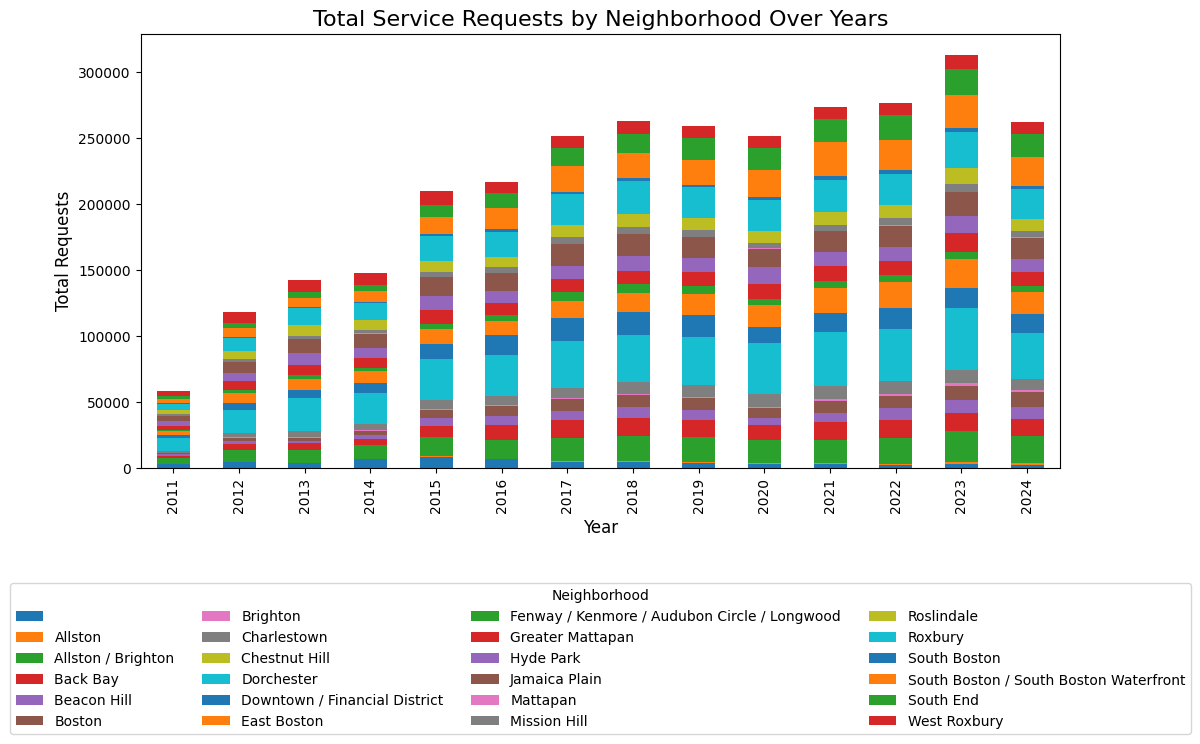

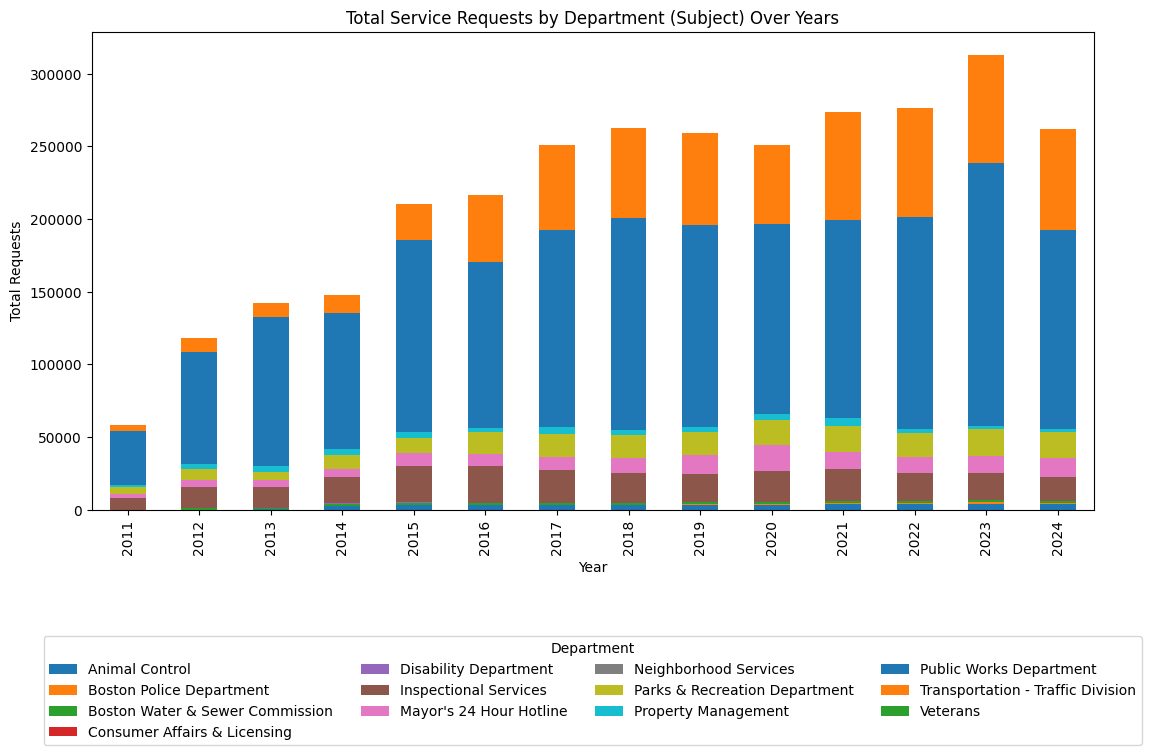

<Figure size 1400x800 with 0 Axes>

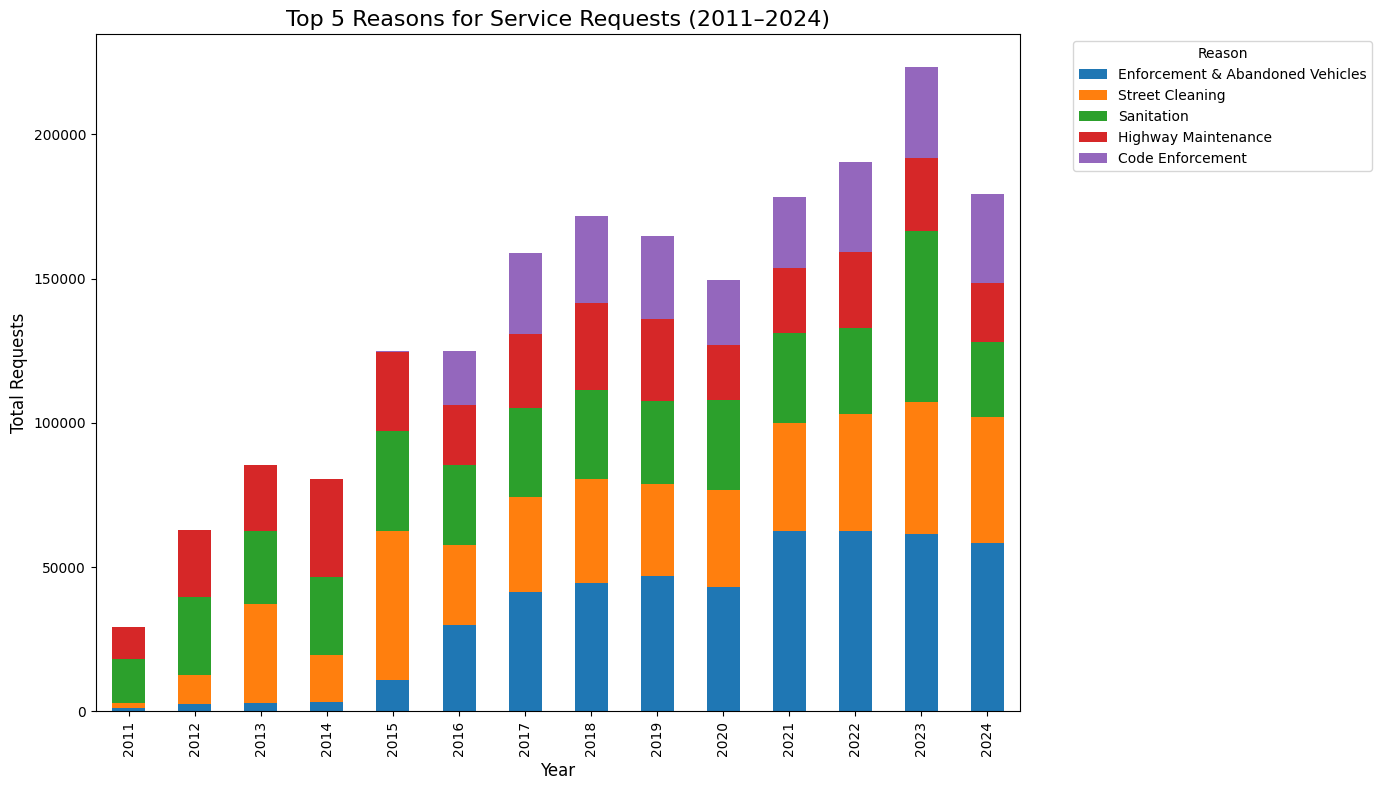

<Figure size 1400x800 with 0 Axes>

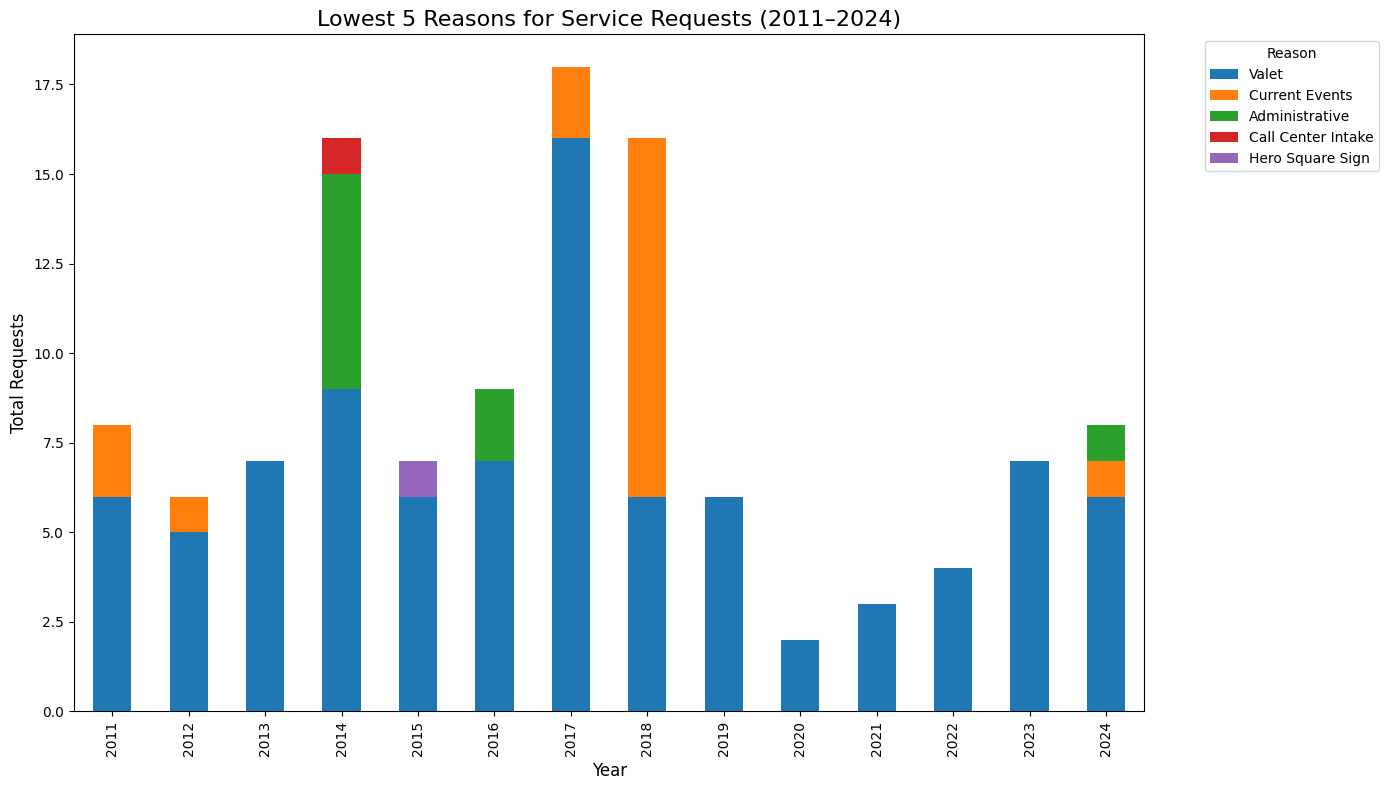

In [ ]:
df['main_section'] = df['queue'].str.split('_').str[0]
main_sections = df['main_section'].unique()

for section in main_sections:
    section_data = df[df['main_section'] == section]
    
    section_counts = section_data.groupby(['year', 'queue']).size().unstack(fill_value=0)
    section_counts.columns = section_counts.columns.str.replace(f'{section}_', '', regex=False)
    
    # Plot stacked bar chart
    plt.figure(figsize=(12, 12))
    section_counts.plot(kind='bar', stacked=True, figsize=(16, 8))
    plt.title(f'Total Service Requests by Queue in {section} Over Years', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Total Requests', fontsize=12)
    plt.legend(title='Queue', bbox_to_anchor=(1.05, 1), loc='best')
    plt.tight_layout()
    plt.show()
    

df_requestsbyneighborhood = df.dropna(subset=['neighborhood'])
neighborhood_counts = df_requestsbyneighborhood.groupby(['year', 'neighborhood']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
neighborhood_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total Service Requests by Neighborhood Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Requests', fontsize=12)
plt.legend(title='Neighborhood', bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=4)
plt.tight_layout()
plt.show()

# 
subject_counts = df.groupby(['year', 'subject']).size().unstack(fill_value=0)
subject_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total Service Requests by Department (Subject) Over Years')
plt.xlabel('Year')
plt.ylabel('Total Requests')
plt.legend(title='Department', bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=4)
plt.tight_layout()
plt.show()


#
df_reasons = df[df['reason'] != 'Test Cases']
reason_counts = df_reasons.groupby(['year', 'reason']).size().unstack(fill_value=0)
total_requests_by_reason = reason_counts.sum(axis=0).sort_values(ascending=False)
top_5_reasons = total_requests_by_reason.head(5).index
lowest_5_reasons = total_requests_by_reason.tail(5).index
top_5_data = reason_counts[top_5_reasons]
lowest_5_data = reason_counts[lowest_5_reasons]

plt.figure(figsize=(14, 8))
top_5_data.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Top 5 Reasons for Service Requests (2011–2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Requests', fontsize=12)
plt.legend(title='Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
lowest_5_data.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Lowest 5 Reasons for Service Requests (2011–2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Requests', fontsize=12)
plt.legend(title='Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Question 3: How is the case volume changing by submission channel SOURCE?

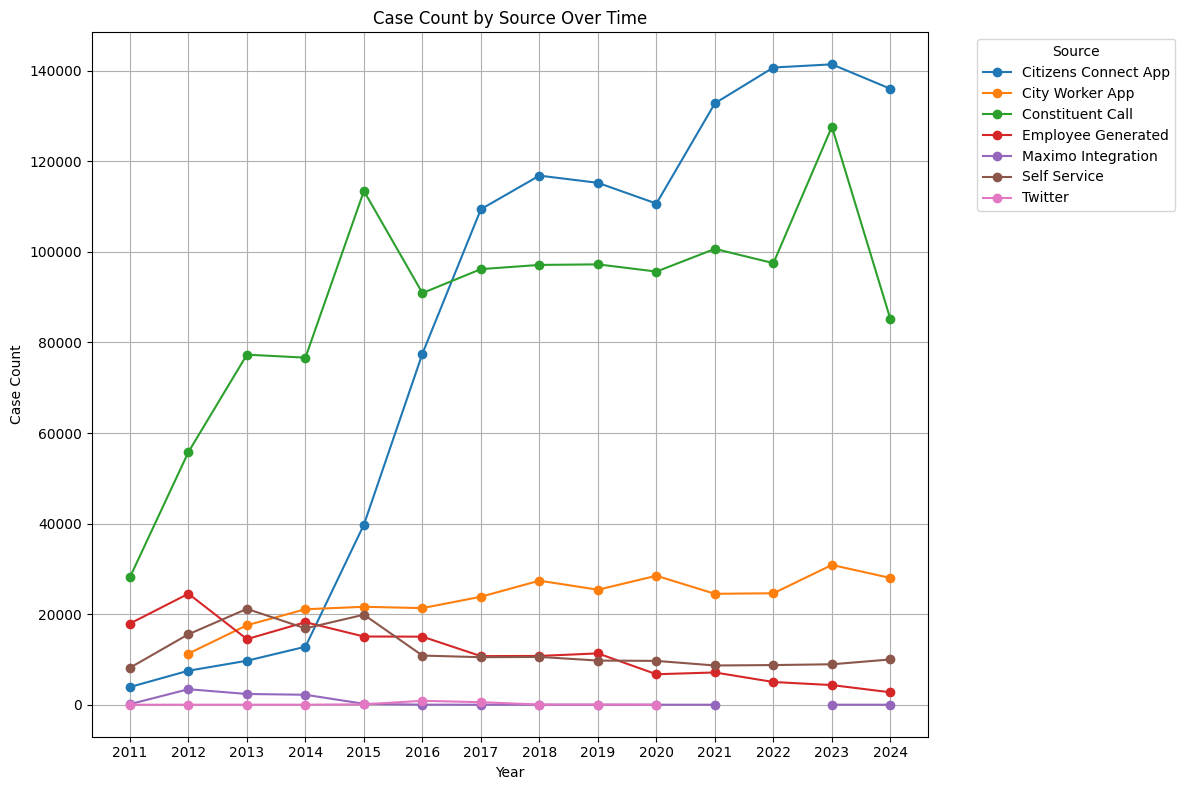

In [4]:
df['source'] = df.get('source', pd.Series()).fillna('Unknown')

case_volume_by_source = df.groupby(['year', 'source']).size().reset_index(name='case_count') #grouping by source and year, and getting the size (count) of cases for each source
df_pivot = case_volume_by_source.pivot(index='year', columns='source', values='case_count')
# Plot the data
df_pivot.plot(marker='o', figsize=(12, 8))
plt.title("Case Count by Source Over Time")
plt.xlabel("Year")
plt.ylabel("Case Count")
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_pivot.index) 
plt.grid()
plt.tight_layout()
plt.show()

Question 4: What is the average # of daily contacts by year?

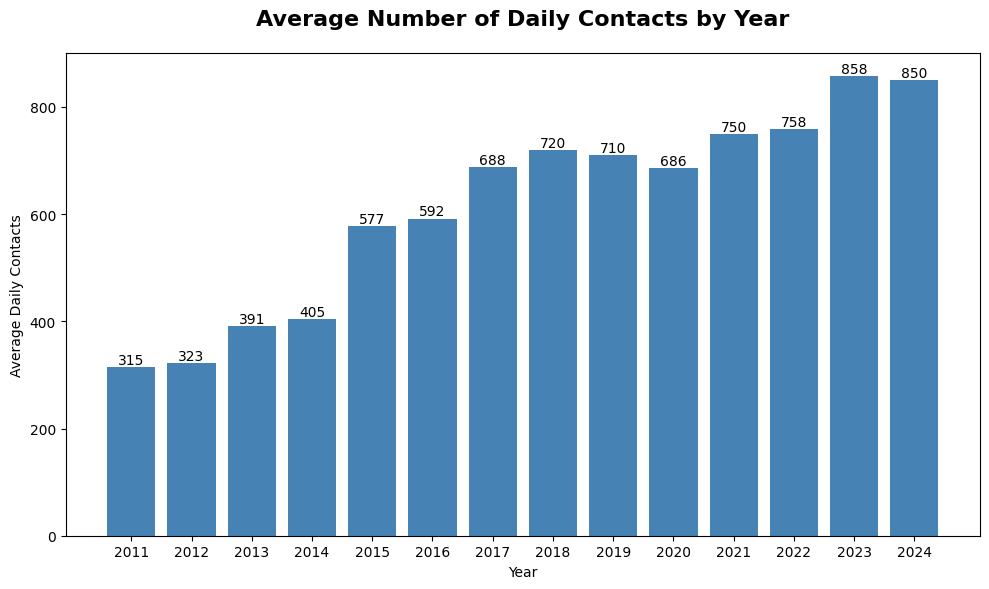

In [ ]:
dfquestion4 = df
dfquestion4['open_dt'] = pd.to_datetime(dfquestion4['open_dt'], errors='coerce')
dfquestion4['year'] = dfquestion4['open_dt'].dt.year
dfquestion4['date'] = dfquestion4['open_dt'].dt.date
daily_contacts_by_year = dfquestion4.groupby(['year', 'date']).size().reset_index(name='daily_count')
avg_daily_contacts_by_year = daily_contacts_by_year.groupby('year')['daily_count'].mean().reset_index(name='avg_daily_contacts')
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_daily_contacts_by_year['year'], avg_daily_contacts_by_year['avg_daily_contacts'], color='steelblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, round(height), f'{round(height):d}',
             ha='center', va='bottom', fontsize=10)  # Rounded values and adjusted formatting

plt.title('Average Number of Daily Contacts by Year', fontsize=16, weight='bold', pad=20)
plt.xlabel('Year')
plt.ylabel('Average Daily Contacts')
plt.xticks(avg_daily_contacts_by_year['year'])
plt.grid(False)
plt.tight_layout()
plt.show()

Question 5: Volume of top 5 request types (TYPE)  

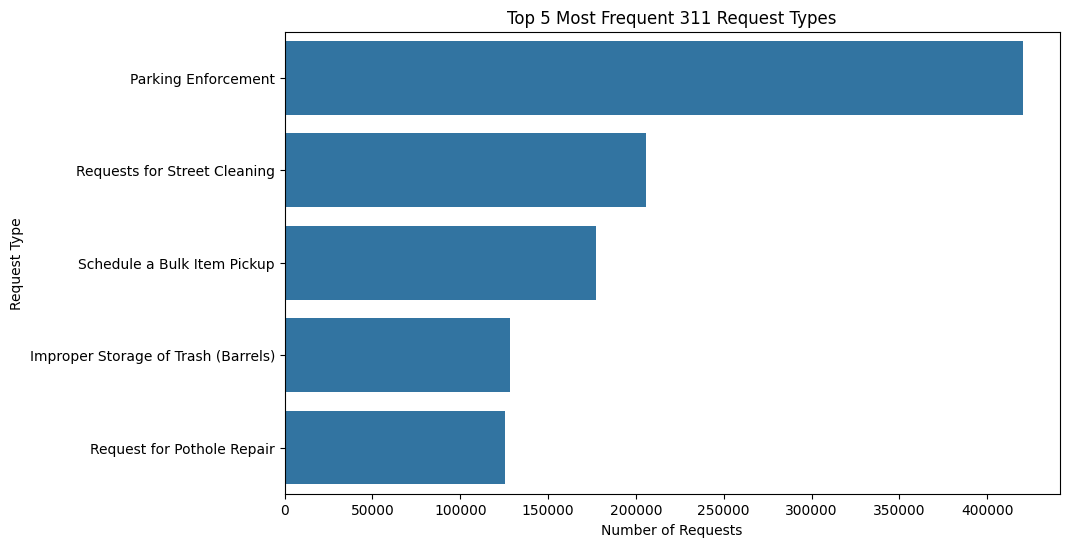

In [8]:
request_counts = df.groupby('case_title')['case_enquiry_id'].count()
top_5_requests = request_counts.sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_requests.values, y=top_5_requests.index)
plt.xlabel('Number of Requests')
plt.ylabel('Request Type')
plt.title('Top 5 Most Frequent 311 Request Types')
plt.show()

Question 6: Average goal resolution time by QUEUE

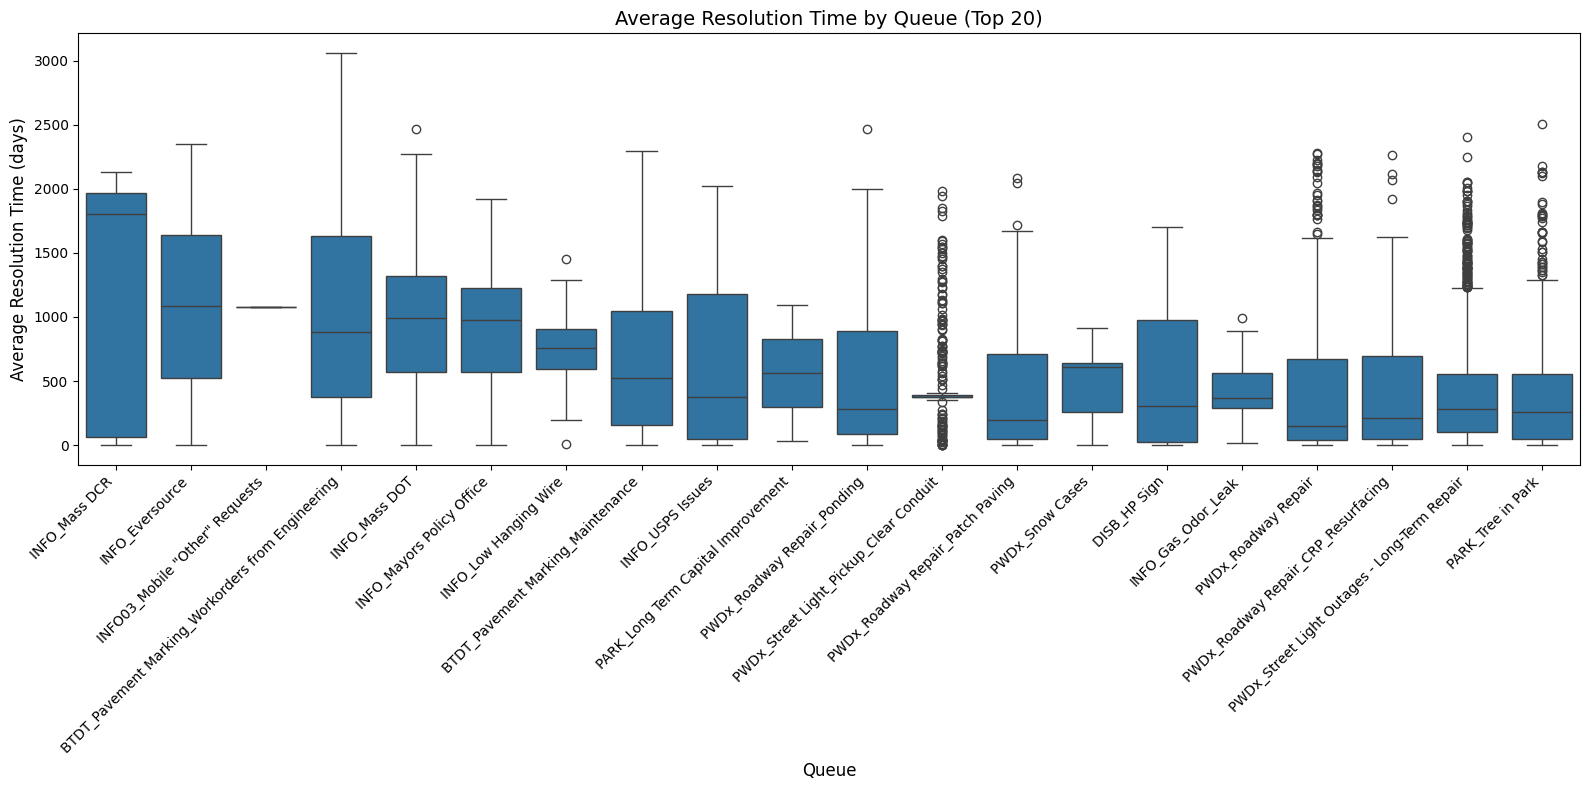

In [11]:
df_question6 = df
df_question6['open_dt'] = pd.to_datetime(df['open_dt'], errors='coerce')
df_question6['closed_dt'] = pd.to_datetime(df['closed_dt'], errors='coerce')
df_question6['sla_target_dt'] = pd.to_datetime(df['sla_target_dt'], errors='coerce')
df_question6['resolution_time'] = (df['closed_dt'] - df['sla_target_dt']).dt.total_seconds() / 86400
df_question6 = df_question6[df_question6['resolution_time'] >= 0]

average_resolution_time_by_queue = df_question6.groupby('queue')['resolution_time'].mean().reset_index()
average_resolution_time_by_queue.columns = ['Queue', 'Average Resolution Time (days)']
average_resolution_time_by_queue = average_resolution_time_by_queue.sort_values(by='Average Resolution Time (days)', ascending=False).head(20)

# top 20 queues
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_question6[df_question6['queue'].isin(average_resolution_time_by_queue['Queue'])], x='queue', y='resolution_time', order=average_resolution_time_by_queue['Queue'])
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Average Resolution Time by Queue (Top 20)', fontsize=14)
plt.xlabel('Queue', fontsize=12)
plt.ylabel('Average Resolution Time (days)', fontsize=12)
plt.tight_layout()
plt.show()

Question 7: Average goal resolution time by QUEUE and neighborhood

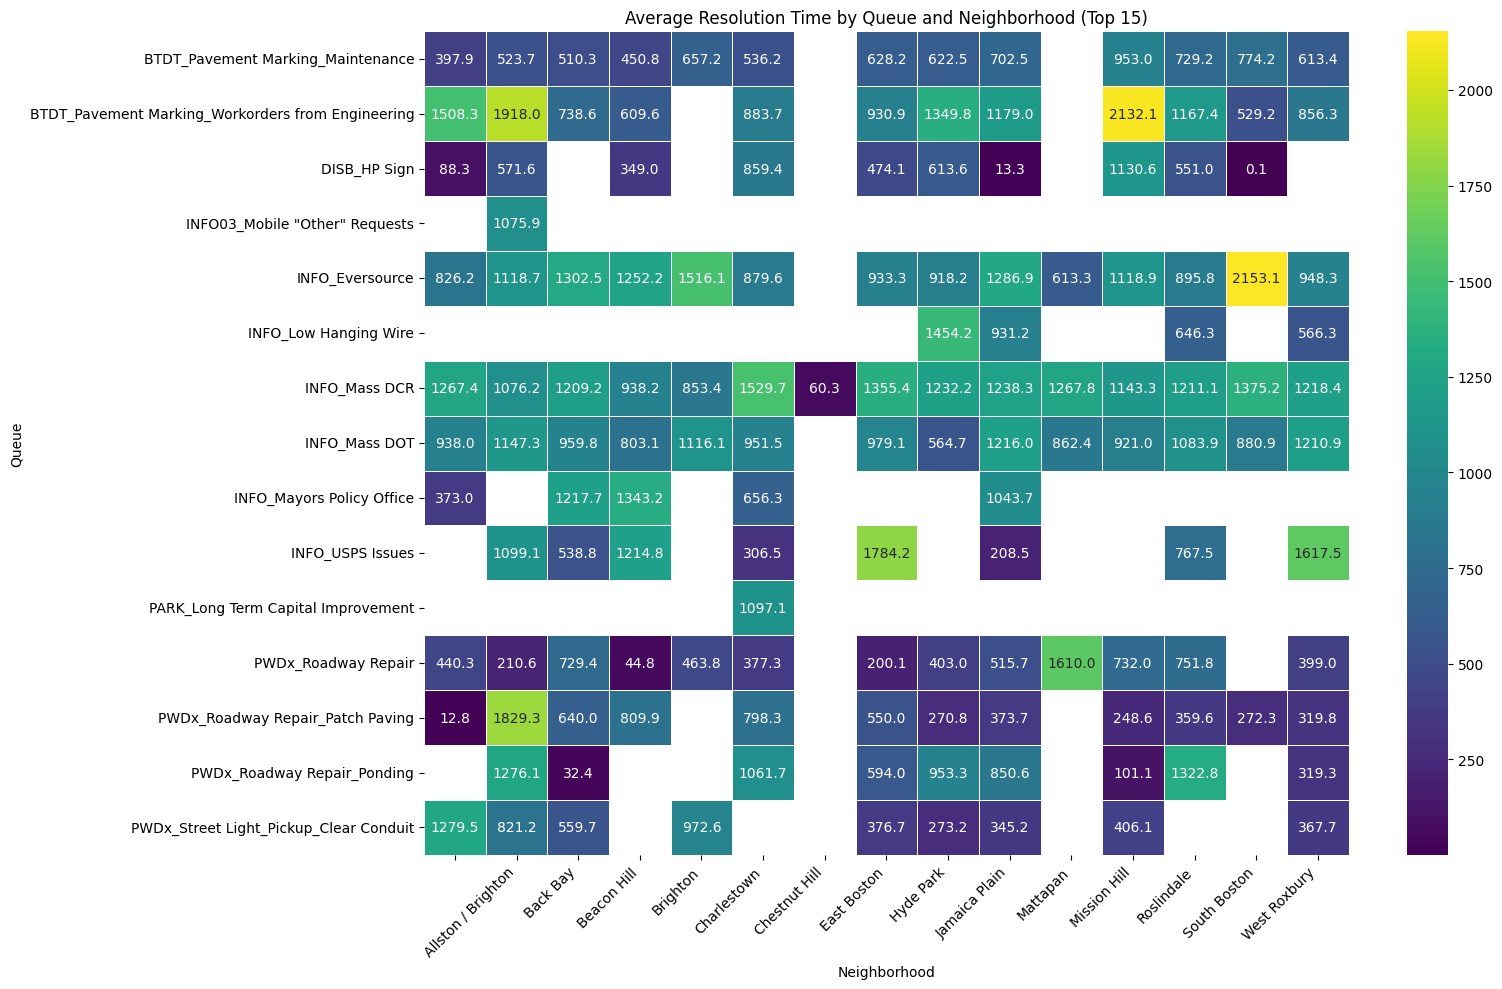

In [14]:
df_question7 = df
df_question7['open_dt'] = pd.to_datetime(df['open_dt'], errors='coerce')
df_question7['closed_dt'] = pd.to_datetime(df['closed_dt'], errors='coerce')
df_question7['sla_target_dt'] = pd.to_datetime(df['sla_target_dt'], errors='coerce')


df_question7['resolution_time'] = (df_question7['closed_dt'] - df_question7['sla_target_dt']).dt.total_seconds() / 86400


df_question7 = df_question7[df_question7['resolution_time'] >= 0]

avg_resolution_time_by_queue_neighborhood = df_question7.groupby(['queue', 'neighborhood'])['resolution_time'].mean().reset_index()
avg_resolution_time_by_queue_neighborhood.columns = ['Queue', 'Neighborhood', 'Average Resolution Time (days)']


top_queues = avg_resolution_time_by_queue_neighborhood.groupby('Queue')['Average Resolution Time (days)'].mean().nlargest(15).index
top_neighborhoods = avg_resolution_time_by_queue_neighborhood.groupby('Neighborhood')['Average Resolution Time (days)'].mean().nlargest(15).index

filtered_data = avg_resolution_time_by_queue_neighborhood[
    (avg_resolution_time_by_queue_neighborhood['Queue'].isin(top_queues)) &
    (avg_resolution_time_by_queue_neighborhood['Neighborhood'].isin(top_neighborhoods))
]

heatmap_data = filtered_data.pivot(index='Queue', columns='Neighborhood', values='Average Resolution Time (days)')

#heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", linewidths=.5, cmap="viridis")
plt.title('Average Resolution Time by Queue and Neighborhood (Top 15)')
plt.xlabel('Neighborhood')
plt.ylabel('Queue')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

Question 8: What % of service requests are closed (CLOSED_DT or CASE_STATUS) vs. no data (CASE_STATUS = null) vs. unresolved (CASE_STATUS = open)?

Total Service Requests: 3043190
Closed: 2789584 (91.67%)
Unresolved: 253606 (8.33%)


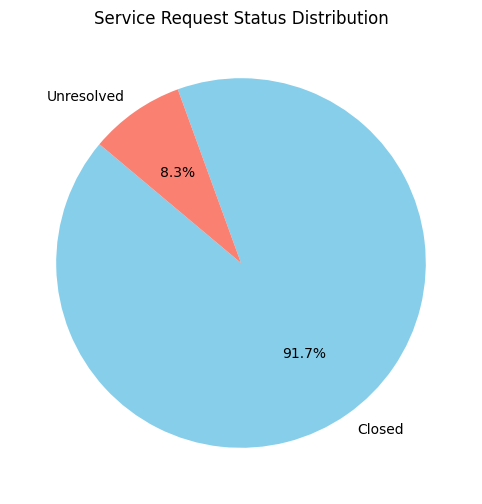

In [41]:
data_df = df

# Ensure the relevant columns exist and normalize the CASE_STATUS column
data_df['case_status'] = data_df['case_status'].str.lower().str.strip()

# Calculate counts and percentages
closed_count = data_df['case_status'].eq('closed').sum()
unresolved_count = data_df['case_status'].eq('open').sum()
total_count = len(data_df)

# Handle percentages safely to avoid division by zero
closed_percentage = (closed_count / total_count) * 100 if total_count > 0 else 0
unresolved_percentage = (unresolved_count / total_count) * 100 if total_count > 0 else 0

# Print results
print(f"Total Service Requests: {total_count}")
print(f"Closed: {closed_count} ({closed_percentage:.2f}%)")
print(f"Unresolved: {unresolved_count} ({unresolved_percentage:.2f}%)")


labels = ['Closed', 'Unresolved']
values = [closed_percentage, unresolved_percentage]

plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title("Service Request Status Distribution")
plt.show()